In [8]:
import pandas as pd
import numpy as np
from numpy import unique
from numpy import where
import matplotlib.pyplot as plt
import sys
import math
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn import metrics
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.datasets import make_classification
from matplotlib import pyplot

In [9]:
def myround(x, base=5):
    return base * round(float(x) / base)

In [106]:
facilities = pd.read_csv("facilities.csv",encoding='latin-1')
facilities

,nyt_id,facility_name,facility_type,facility_city,facility_county,facility_county_fips,facility_state,facility_lng,facility_lat,latest_inmate_population,max_inmate_population_2020,total_inmate_cases,total_inmate_deaths,total_officer_cases,total_officer_deaths,note
0,F3EFE858,Alex City Work Release prison,Low-security work release,Alex City,Coosa,1037,Alabama,-86.009015,32.904507,188.0,NaN,77,0,17,0.0,NaN
1,5B910220,Alabama Therapeutic Education Facility prison,State rehabilitation center,Columbiana,Shelby,1117,Alabama,-86.624068,33.180755,272.0,NaN,11,1,2,0.0,NaN
2,02FB1675,Bibb Correctional Facility,State prison,Brent,Bibb,1007,Alabama,-87.162781,32.920754,1725.0,1825.0,164,3,61,0.0,NaN
3,6378F6C4,Birmingham Women's Community Based Facility an...,State prison,Birmingham,Jefferson,1073,Alabama,-86.808344,33.531101,192.0,NaN,17,0,28,0.0,NaN
4,EAABF900,Bullock Correctional Facility,State prison,Bessemer,Bullock,1011,Alabama,-85.673927,32.147144,1477.0,1577.0,162,5,80,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,15289545,North Lake federal prison,Federal prison,Baldwin,Lake,26085,Michigan,-85.839287,43.928551,1614.0,1614.0,125,2,0,0.0,NaN
2635,1558C2BF,Rivers federal prison,Federal prison,Winton,Hertford,37091,North Carolina,-76.958751,36.403668,6.0,1255.0,68,1,0,0.0,NaN
2636,C9CF62B9,Reeves County federal prison,Federal prison,Pecos,Reeves,48389,Texas,-103.493817,31.423563,1005.0,NaN,46,1,0,0.0,NaN
2637,364869B9,Flightline federal prison,Federal prison,Big Spring,Howard,48227,Texas,-101.521236,32.224310,1652.0,NaN,34,1,0,0.0,NaN


In [107]:
facilities = facilities.dropna(subset=['latest_inmate_population'])

facilities['capacity'] = 1
facilities['capacity'] = facilities.apply(lambda x: float("nan") if (math.isnan(x.max_inmate_population_2020)) or (math.isnan(x.latest_inmate_population)) else int(x.latest_inmate_population / x.max_inmate_population_2020 * 100) / 100, axis = 1)
#display(facilities)
t = facilities['facility_type'].value_counts(normalize=True)
#display(t)
s = facilities['capacity'].value_counts(normalize=True)
#display(s)
facilities.capacity_nan = facilities['capacity']

facilities.loc[facilities['capacity'].isna(), 'capacity_nan'] = np.random.choice(s.index, p=s.values, size=facilities['capacity'].isna().sum())
#display(facilities.sort_values(by=['capacity_nan']))
facilities.max_inmate_population_2020 = facilities.apply(lambda x: x.max_inmate_population_2020 if math.isnan(x.capacity_nan) or x.capacity_nan == 0 else x.latest_inmate_population / x.capacity_nan, axis = 1)
facilities = facilities.dropna(subset=['max_inmate_population_2020'])
facilities.max_inmate_population_2020 = facilities.max_inmate_population_2020.astype(int)
#display(facilities.sort_values(by=['capacity_nan']))

t = facilities['facility_type'].value_counts(normalize=True)
#display(t)
facilities

<ipython-input-107-e082c2e59629>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  facilities['capacity'] = 1
<ipython-input-107-e082c2e59629>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  facilities['capacity'] = facilities.apply(lambda x: float("nan") if (math.isnan(x.max_inmate_population_2020)) or (math.isnan(x.latest_inmate_population)) else int(x.latest_inmate_population / x.max_inmate_population_2020 * 100) / 100, axis = 1)
<ipython-input-107-e082c2e59629>:10: UserWarning: Pandas doesn't allow colu

,nyt_id,facility_name,facility_type,facility_city,facility_county,facility_county_fips,facility_state,facility_lng,facility_lat,latest_inmate_population,max_inmate_population_2020,total_inmate_cases,total_inmate_deaths,total_officer_cases,total_officer_deaths,note,capacity,capacity_nan
0,F3EFE858,Alex City Work Release prison,Low-security work release,Alex City,Coosa,1037,Alabama,-86.009015,32.904507,188.0,191,77,0,17,0.0,NaN,NaN,0.98
1,5B910220,Alabama Therapeutic Education Facility prison,State rehabilitation center,Columbiana,Shelby,1117,Alabama,-86.624068,33.180755,272.0,312,11,1,2,0.0,NaN,NaN,0.87
2,02FB1675,Bibb Correctional Facility,State prison,Brent,Bibb,1007,Alabama,-87.162781,32.920754,1725.0,1825,164,3,61,0.0,NaN,0.94,NaN
3,6378F6C4,Birmingham Women's Community Based Facility an...,State prison,Birmingham,Jefferson,1073,Alabama,-86.808344,33.531101,192.0,304,17,0,28,0.0,NaN,NaN,0.63
4,EAABF900,Bullock Correctional Facility,State prison,Bessemer,Bullock,1011,Alabama,-85.673927,32.147144,1477.0,1577,162,5,80,1.0,NaN,0.93,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,15289545,North Lake federal prison,Federal prison,Baldwin,Lake,26085,Michigan,-85.839287,43.928551,1614.0,1614,125,2,0,0.0,NaN,1.00,NaN
2635,1558C2BF,Rivers federal prison,Federal prison,Winton,Hertford,37091,North Carolina,-76.958751,36.403668,6.0,1255,68,1,0,0.0,NaN,0.00,NaN
2636,C9CF62B9,Reeves County federal prison,Federal prison,Pecos,Reeves,48389,Texas,-103.493817,31.423563,1005.0,1015,46,1,0,0.0,NaN,NaN,0.99
2637,364869B9,Flightline federal prison,Federal prison,Big Spring,Howard,48227,Texas,-101.521236,32.224310,1652.0,1652,34,1,0,0.0,NaN,NaN,1.00


In [108]:
facilities['lng_round'] = facilities.apply(lambda x: myround(x.facility_lng), axis = 1)
facilities['lat_round'] = facilities.apply(lambda x: myround(x.facility_lat), axis = 1)

facilities = facilities.drop(['note'], axis=1)
facilities['capacity']     = facilities['capacity'].fillna(0)
facilities['capacity_nan'] = facilities['capacity_nan'].fillna(0)

facilities['capacity_all']  = facilities['capacity'] + facilities['capacity_nan']
#facilities.to_csv('First_prepro.csv', index=False)
facilities

,nyt_id,facility_name,facility_type,facility_city,facility_county,facility_county_fips,facility_state,facility_lng,facility_lat,latest_inmate_population,max_inmate_population_2020,total_inmate_cases,total_inmate_deaths,total_officer_cases,total_officer_deaths,capacity,capacity_nan,lng_round,lat_round,capacity_all
0,F3EFE858,Alex City Work Release prison,Low-security work release,Alex City,Coosa,1037,Alabama,-86.009015,32.904507,188.0,191,77,0,17,0.0,0.00,0.98,-90,30,0.98
1,5B910220,Alabama Therapeutic Education Facility prison,State rehabilitation center,Columbiana,Shelby,1117,Alabama,-86.624068,33.180755,272.0,312,11,1,2,0.0,0.00,0.87,-90,30,0.87
2,02FB1675,Bibb Correctional Facility,State prison,Brent,Bibb,1007,Alabama,-87.162781,32.920754,1725.0,1825,164,3,61,0.0,0.94,0.00,-90,30,0.94
3,6378F6C4,Birmingham Women's Community Based Facility an...,State prison,Birmingham,Jefferson,1073,Alabama,-86.808344,33.531101,192.0,304,17,0,28,0.0,0.00,0.63,-90,30,0.63
4,EAABF900,Bullock Correctional Facility,State prison,Bessemer,Bullock,1011,Alabama,-85.673927,32.147144,1477.0,1577,162,5,80,1.0,0.93,0.00,-90,30,0.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,15289545,North Lake federal prison,Federal prison,Baldwin,Lake,26085,Michigan,-85.839287,43.928551,1614.0,1614,125,2,0,0.0,1.00,0.00,-90,40,1.00
2635,1558C2BF,Rivers federal prison,Federal prison,Winton,Hertford,37091,North Carolina,-76.958751,36.403668,6.0,1255,68,1,0,0.0,0.00,0.00,-80,40,0.00
2636,C9CF62B9,Reeves County federal prison,Federal prison,Pecos,Reeves,48389,Texas,-103.493817,31.423563,1005.0,1015,46,1,0,0.0,0.00,0.99,-100,30,0.99
2637,364869B9,Flightline federal prison,Federal prison,Big Spring,Howard,48227,Texas,-101.521236,32.224310,1652.0,1652,34,1,0,0.0,0.00,1.00,-100,30,1.00


In [109]:
values = {"latest_inmate_population": 1}
facilities.fillna(value=values)
facilities.capacity = facilities.apply(lambda x: float("nan") if (math.isnan(x.max_inmate_population_2020)) or (math.isnan(x.latest_inmate_population)) else int(x.latest_inmate_population / x.max_inmate_population_2020 * 100) / 100, axis = 1)

s = facilities.capacity.value_counts(normalize=True)
facilities.capacity_nan= facilities.capacity
facilities.loc[facilities.capacity.isna(), 'capacity_nan'] = np.random.choice(s.index, p=s.values, size=facilities.capacity.isna().sum())
#display(facilities.sort_values(by=['capacity_nan']))
facilities.max_inmate_population_2020 = facilities.apply(lambda x: x.max_inmate_population_2020 if math.isnan(x.capacity_nan) or x.capacity_nan == 0 else x.latest_inmate_population / x.capacity_nan, axis = 1)
facilities = facilities.dropna(subset=['max_inmate_population_2020'])
facilities.max_inmate_population_2020 = facilities.max_inmate_population_2020.astype(int)
#display(facilities.sort_values(by=['capacity_nan']))

facilities.facility_lat = (facilities.facility_lat * 10).astype(int) / 10
facilities.facility_lng = (facilities.facility_lng * 10).astype(int) / 10
#facilities = facilities.drop(['note'], axis=1)

facilities

,nyt_id,facility_name,facility_type,facility_city,facility_county,facility_county_fips,facility_state,facility_lng,facility_lat,latest_inmate_population,max_inmate_population_2020,total_inmate_cases,total_inmate_deaths,total_officer_cases,total_officer_deaths,capacity,capacity_nan,lng_round,lat_round,capacity_all
0,F3EFE858,Alex City Work Release prison,Low-security work release,Alex City,Coosa,1037,Alabama,-86.0,32.9,188.0,191,77,0,17,0.0,0.98,0.98,-90,30,0.98
1,5B910220,Alabama Therapeutic Education Facility prison,State rehabilitation center,Columbiana,Shelby,1117,Alabama,-86.6,33.1,272.0,312,11,1,2,0.0,0.87,0.87,-90,30,0.87
2,02FB1675,Bibb Correctional Facility,State prison,Brent,Bibb,1007,Alabama,-87.1,32.9,1725.0,1835,164,3,61,0.0,0.94,0.94,-90,30,0.94
3,6378F6C4,Birmingham Women's Community Based Facility an...,State prison,Birmingham,Jefferson,1073,Alabama,-86.8,33.5,192.0,304,17,0,28,0.0,0.63,0.63,-90,30,0.63
4,EAABF900,Bullock Correctional Facility,State prison,Bessemer,Bullock,1011,Alabama,-85.6,32.1,1477.0,1588,162,5,80,1.0,0.93,0.93,-90,30,0.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,15289545,North Lake federal prison,Federal prison,Baldwin,Lake,26085,Michigan,-85.8,43.9,1614.0,1614,125,2,0,0.0,1.00,1.00,-90,40,1.00
2635,1558C2BF,Rivers federal prison,Federal prison,Winton,Hertford,37091,North Carolina,-76.9,36.4,6.0,1255,68,1,0,0.0,0.00,0.00,-80,40,0.00
2636,C9CF62B9,Reeves County federal prison,Federal prison,Pecos,Reeves,48389,Texas,-103.4,31.4,1005.0,1015,46,1,0,0.0,0.99,0.99,-100,30,0.99
2637,364869B9,Flightline federal prison,Federal prison,Big Spring,Howard,48227,Texas,-101.5,32.2,1652.0,1652,34,1,0,0.0,1.00,1.00,-100,30,1.00


In [115]:
mydata = facilities.copy()
#mydata = pd.read_csv("after_clean.csv")

# יש עדיין כמה נאלים שלא בעמודות החדשות שרסקו הוסיף אז מוחק תשורות עם הנאלים
mydata = mydata.dropna(subset = mydata.columns.values[:-2]).reset_index(drop = True)

# add relevant features
mydata['ratio_cases_inmate']   = mydata['total_inmate_cases']   / mydata['max_inmate_population_2020']
mydata['ratio_deaths_inmate']  = mydata['total_inmate_deaths']  / mydata['max_inmate_population_2020']
mydata['ratio_cases_officer']  = mydata['total_officer_cases']  / mydata['max_inmate_population_2020']
mydata['ratio_deaths_officer'] = mydata['total_officer_deaths'] / mydata['max_inmate_population_2020']

# יצירת עותק לניתוח אחרי הקלאסטרינג
data_before_encoding = mydata.copy()

mydata = mydata.drop(columns = ['nyt_id','facility_name','capacity','capacity_nan','facility_county_fips'])

ohe = OneHotEncoder(sparse=False)

# רק את העמודות הבאות אני ממיר לנומרי. השאר או כבר נומרי או לא רלוונטי לניתוח
a = ['facility_type' , 'facility_city' , 'facility_county' , 'facility_state']

b = ohe.fit_transform(mydata[a])

# הנתונים המומרים לעיל הם מסוג נאמפיי אז אני עורך פה לדאטה פריים חתיך
# בלולאות אני פשוט מושך את כל השמות לרשימה אחת
c = pd.DataFrame(b , columns = [j for i in range(4) for j in ohe.categories_[i]])

# מחבר בין הדאטה המקורי שכבר היה לנו לעמודות החדשות
mydata = pd.concat([mydata , c] , axis = 1 , ignore_index = False)

# מעיף תעמודות שהימרתי אותן הרגע לנומרי
mydata = mydata.drop(columns = a)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(mydata)
scaler.transform(mydata)

mydata = pd.DataFrame(scaler.transform(mydata),columns = mydata.columns)
mydata

,facility_lng,facility_lat,latest_inmate_population,max_inmate_population_2020,total_inmate_cases,total_inmate_deaths,total_officer_cases,total_officer_deaths,lng_round,lat_round,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,0.799597,0.312500,0.021706,0.022055,0.020189,0.000000,0.014214,0.00,0.8,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.793555,0.316810,0.031457,0.036100,0.002884,0.022222,0.001672,0.00,0.8,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.788520,0.312500,0.200116,0.212885,0.042999,0.066667,0.051003,0.00,0.8,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.791541,0.325431,0.022171,0.035171,0.004457,0.000000,0.023411,0.00,0.8,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.803625,0.295259,0.171329,0.184214,0.042475,0.111111,0.066890,0.25,0.8,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583,0.801611,0.549569,0.187232,0.187232,0.032774,0.044444,0.000000,0.00,0.8,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1584,0.891239,0.387931,0.000580,0.145560,0.017829,0.022222,0.000000,0.00,0.9,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1585,0.624371,0.280172,0.116541,0.117702,0.012061,0.022222,0.000000,0.00,0.7,0.25,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1586,0.643505,0.297414,0.191642,0.191642,0.008915,0.022222,0.000000,0.00,0.7,0.25,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
# PCA

In [116]:
reduction_pca = PCA(n_components=2)
reduced_features = reduction_pca.fit_transform(mydata)

In [53]:
# Elbow method to determine the optimal number of clusters:

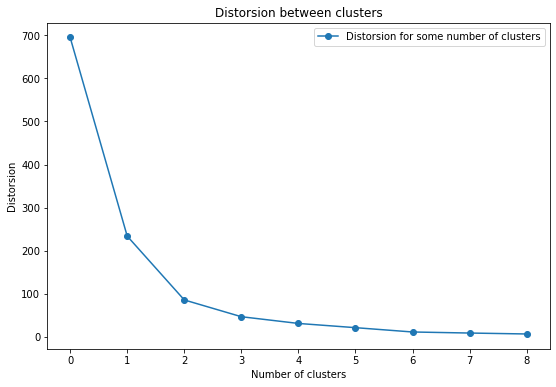

In [117]:
# במקום שנבחר מספר קבוצות שרירותי, נבחר את מספר הקבוצות המיטבי ע"פ שיטת המרפק
cluster_distorsion = []
for i in range(1, 10):
    test_sklearn = KMeans(n_clusters=i)
    test_sklearn.fit(reduced_features)
    cluster_distorsion.append(test_sklearn.inertia_)
plt.figure(figsize=(9, 6))
plt.plot(cluster_distorsion, marker='o', label='Distorsion for some number of clusters')
plt.title("Distorsion between clusters")
plt.xlabel('Number of clusters')
plt.ylabel("Distorsion")
plt.legend()
plt.show()

In [55]:
# 3 clusters it is.

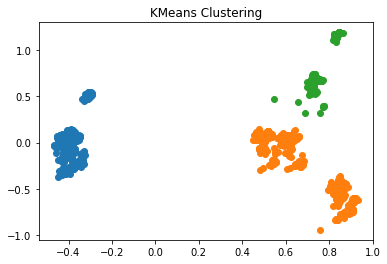

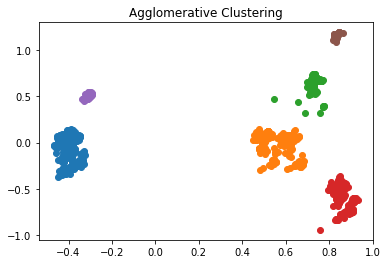

In [127]:
for i in range(2):
    X = reduced_features.copy()
    clustering_algorithms = ["KMeans", "Agglomerative"]
    # define the model
    if   i==0:
        model = KMeans(n_clusters=3)
    #elif i==1:
    else:
        model = AgglomerativeClustering(n_clusters=6)
    
    # fit model and predict clusters
    yhat = model.fit_predict(X)
    
    # save the classes into the original dataset
    data_before_encoding[clustering_algorithms[i]] = yhat
    
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    for cluster in clusters:
        # get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)
        # create scatter of these samples
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
        # create title
        pyplot.title(clustering_algorithms[i]+" Clustering")
    # show the plot
    pyplot.show()

In [128]:
data_before_encoding

,nyt_id,facility_name,facility_type,facility_city,facility_county,facility_county_fips,facility_state,facility_lng,facility_lat,latest_inmate_population,...,capacity_nan,lng_round,lat_round,capacity_all,ratio_cases_inmate,ratio_deaths_inmate,ratio_cases_officer,ratio_deaths_officer,KMeans,Agglomerative
0,F3EFE858,Alex City Work Release prison,Low-security work release,Alex City,Coosa,1037,Alabama,-86.0,32.9,188.0,...,0.98,-90,30,0.98,0.403141,0.000000,0.089005,0.00000,1,1
1,5B910220,Alabama Therapeutic Education Facility prison,State rehabilitation center,Columbiana,Shelby,1117,Alabama,-86.6,33.1,272.0,...,0.87,-90,30,0.87,0.035256,0.003205,0.006410,0.00000,1,1
2,02FB1675,Bibb Correctional Facility,State prison,Brent,Bibb,1007,Alabama,-87.1,32.9,1725.0,...,0.94,-90,30,0.94,0.089373,0.001635,0.033243,0.00000,0,0
3,6378F6C4,Birmingham Women's Community Based Facility an...,State prison,Birmingham,Jefferson,1073,Alabama,-86.8,33.5,192.0,...,0.63,-90,30,0.63,0.055921,0.000000,0.092105,0.00000,0,0
4,EAABF900,Bullock Correctional Facility,State prison,Bessemer,Bullock,1011,Alabama,-85.6,32.1,1477.0,...,0.93,-90,30,0.93,0.102015,0.003149,0.050378,0.00063,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583,15289545,North Lake federal prison,Federal prison,Baldwin,Lake,26085,Michigan,-85.8,43.9,1614.0,...,1.00,-90,40,1.00,0.077447,0.001239,0.000000,0.00000,1,1
1584,1558C2BF,Rivers federal prison,Federal prison,Winton,Hertford,37091,North Carolina,-76.9,36.4,6.0,...,0.00,-80,40,0.00,0.054183,0.000797,0.000000,0.00000,1,1
1585,C9CF62B9,Reeves County federal prison,Federal prison,Pecos,Reeves,48389,Texas,-103.4,31.4,1005.0,...,0.99,-100,30,0.99,0.045320,0.000985,0.000000,0.00000,1,1
1586,364869B9,Flightline federal prison,Federal prison,Big Spring,Howard,48227,Texas,-101.5,32.2,1652.0,...,1.00,-100,30,1.00,0.020581,0.000605,0.000000,0.00000,1,1


In [129]:
data_before_encoding.corr()

,facility_county_fips,facility_lng,facility_lat,latest_inmate_population,max_inmate_population_2020,total_inmate_cases,total_inmate_deaths,total_officer_cases,total_officer_deaths,capacity,capacity_nan,lng_round,lat_round,capacity_all,ratio_cases_inmate,ratio_deaths_inmate,ratio_cases_officer,ratio_deaths_officer,KMeans,Agglomerative
facility_county_fips,1.000000,0.159953,0.124834,-0.037407,-0.043344,-0.085203,-0.051309,-0.077980,0.005487,0.035189,0.035189,0.138394,0.154652,0.040315,0.027809,0.005182,0.004969,0.041954,-0.068609,-0.206708
facility_lng,0.159953,1.000000,-0.143894,-0.110114,-0.111437,-0.197271,-0.002287,-0.160878,-0.082207,0.017672,0.017672,0.982921,-0.169751,0.013634,-0.017484,0.049831,0.001579,-0.008692,0.042786,0.056602
facility_lat,0.124834,-0.143894,1.000000,-0.123490,-0.114625,0.020899,-0.068328,-0.016697,-0.092595,-0.060924,-0.060924,-0.124896,0.895906,-0.055224,-0.039746,-0.058437,-0.049362,-0.044975,-0.156460,-0.338765
latest_inmate_population,-0.037407,-0.110114,-0.123490,1.000000,0.966142,0.688882,0.447670,0.623235,0.337949,0.110887,0.110887,-0.112698,-0.113959,0.123970,-0.024250,0.129289,-0.062012,0.034642,-0.274702,-0.155602
max_inmate_population_2020,-0.043344,-0.111437,-0.114625,0.966142,1.000000,0.686775,0.457476,0.605667,0.315467,-0.073438,-0.073438,-0.112400,-0.102386,-0.060606,-0.025416,0.128597,-0.064222,0.025757,-0.250186,-0.149754
total_inmate_cases,-0.085203,-0.197271,0.020899,0.688882,0.686775,1.000000,0.436413,0.569154,0.270907,0.010313,0.010313,-0.193980,0.037980,0.019346,0.033280,0.185015,-0.012516,0.049986,-0.189552,-0.152341
total_inmate_deaths,-0.051309,-0.002287,-0.068328,0.447670,0.457476,0.436413,1.000000,0.381831,0.296423,-0.015110,-0.015110,0.001742,-0.065854,-0.009365,-0.004635,0.695642,-0.022025,0.098594,-0.164390,-0.132237
total_officer_cases,-0.077980,-0.160878,-0.016697,0.623235,0.605667,0.569154,0.381831,1.000000,0.410403,0.047220,0.047220,-0.164948,0.018253,0.054580,0.016567,0.169520,0.020356,0.114940,-0.202906,-0.094873
total_officer_deaths,0.005487,-0.082207,-0.092595,0.337949,0.315467,0.270907,0.296423,0.410403,1.000000,0.059798,0.059798,-0.087184,-0.079556,0.063703,-0.003913,0.167986,-0.008186,0.580597,-0.097241,-0.060626
capacity,0.035189,0.017672,-0.060924,0.110887,-0.073438,0.010313,-0.015110,0.047220,0.059798,1.000000,1.000000,0.015372,-0.050235,0.997768,0.026101,0.013136,0.040697,0.046356,-0.063979,0.023639


In [15]:
# שמירה עבור בדיקה של רסקו
#data_before_encoding.to_csv('with_clusteing_lables.csv')

In [ ]:
# מכאן צריך להמשיך ולסיים בניתוחים

In [130]:
def myround(x, base = 10):
    return base * round(float(x) / base)

def myround_freq(x, base = 5):
    return base * round(float(x * 100) / base) / 100

data = data_before_encoding.copy()
#data = pd.read_csv("with_clusteing_lables.csv",encoding='latin-1')

data['lng_round']  = data.apply(lambda x: myround(x.facility_lng                          ), axis = 1)
data['lat_round']  = data.apply(lambda x: myround(x.facility_lat                          ), axis = 1)
data['max_round']  = data.apply(lambda x: myround(x.max_inmate_population_2020 , base = 50), axis = 1)
data['late_round'] = data.apply(lambda x: myround(x.latest_inmate_population   , base = 50), axis = 1)

data['area']      = data['lng_round'].astype(str) + '_' + data['lat_round'].astype(str)

#data              = data.merge(facilities, how = 'inner')

data_original     = data.dropna(subset=['capacity'    ]).reset_index()
data_imputed      = data.dropna(subset=['capacity_nan']).reset_index()

data_imputed ['capacity_round'] = data_imputed.apply(lambda x:  myround_freq(x.capacity_nan), axis = 1)
data_original['capacity_round'] = data_original.apply(lambda x: myround_freq(x.capacity)   , axis = 1 )

#display(data_imputed.filter(items =  ['capacity_nan', 'capacity_round']))
#display(data_original.filter(items = ['capacity'   , 'capacity_round' ]))

#print(display(data_imputed.columns))

#display(data_original, data_imputed)

In [134]:
data_imputed  = data_imputed. filter(items =  ['latest_inmate_population', 'max_inmate_population_2020', 'total_inmate_cases', 'total_inmate_deaths', 'total_officer_cases', 'total_officer_deaths', 'ratio_cases_inmate', 'ratio_deaths_inmate', 'ratio_cases_officer', 'ratio_deaths_officer', 'lng_round', 'lat_round', 'capacity_round', 'facility_type', 'facility_state', 'area', 'KMeans', 'Agglomerative'])
data_original = data_original.filter(items =  ['latest_inmate_population', 'max_inmate_population_2020', 'total_inmate_cases', 'total_inmate_deaths', 'total_officer_cases', 'total_officer_deaths', 'ratio_cases_inmate', 'ratio_deaths_inmate', 'ratio_cases_officer', 'ratio_deaths_officer', 'lng_round', 'lat_round', 'capacity_round', 'facility_type', 'facility_state', 'area', 'KMeans', 'Agglomerative'])
data = data.filter(items =  ['latest_inmate_population', 'max_inmate_population_2020', 'total_inmate_cases', 'total_inmate_deaths', 'total_officer_cases', 'total_officer_deaths', 'ratio_cases_inmate', 'ratio_deaths_inmate', 'ratio_cases_officer', 'ratio_deaths_officer', 'lng_round', 'lat_round', 'capacity_round', 'facility_type', 'facility_state', 'area', 'KMeans', 'Agglomerative'])

In [132]:
data_imputed.dtypes

latest_inmate_population      float64
max_inmate_population_2020      int32
total_inmate_cases              int64
total_inmate_deaths             int64
total_officer_cases             int64
total_officer_deaths          float64
ratio_cases_inmate            float64
ratio_deaths_inmate           float64
ratio_cases_officer           float64
ratio_deaths_officer          float64
lng_round                       int64
lat_round                       int64
capacity_round                float64
facility_type                  object
facility_state                 object
area                           object
KMeans                          int32
Agglomerative                   int64
dtype: object

1


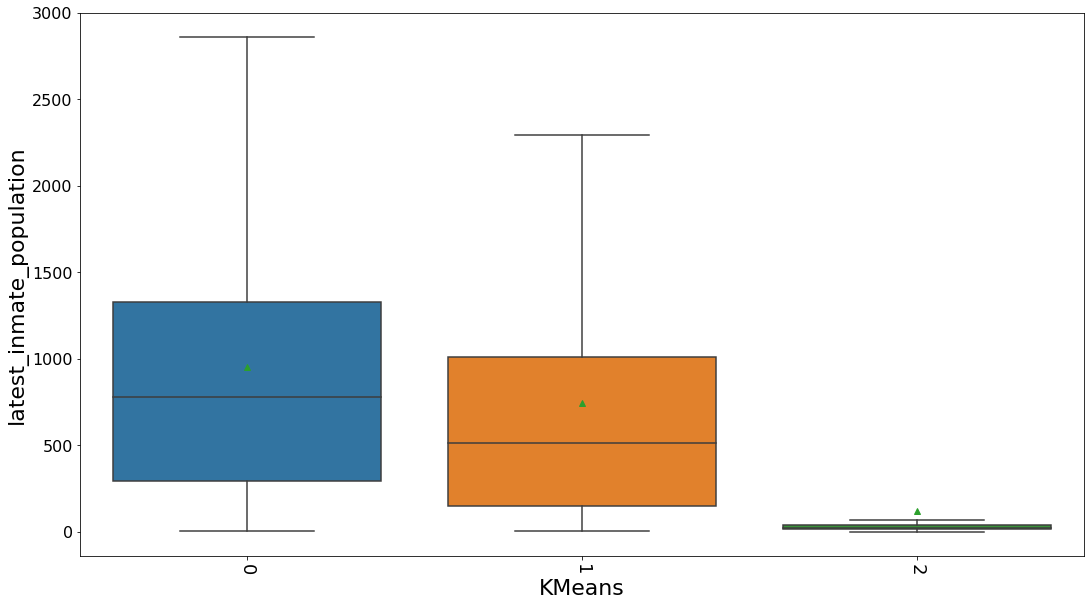

1


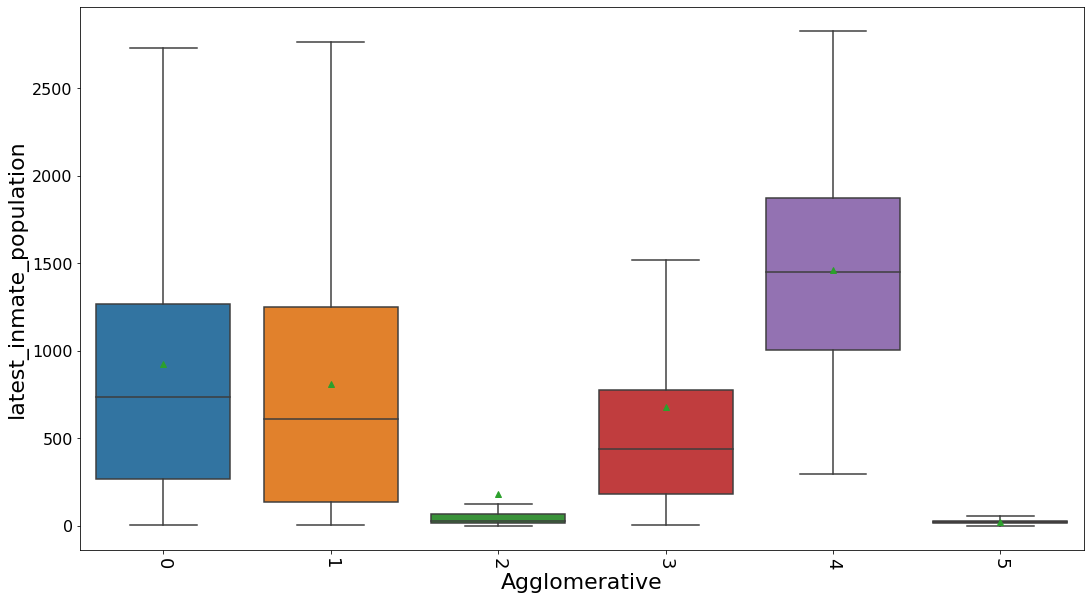

1


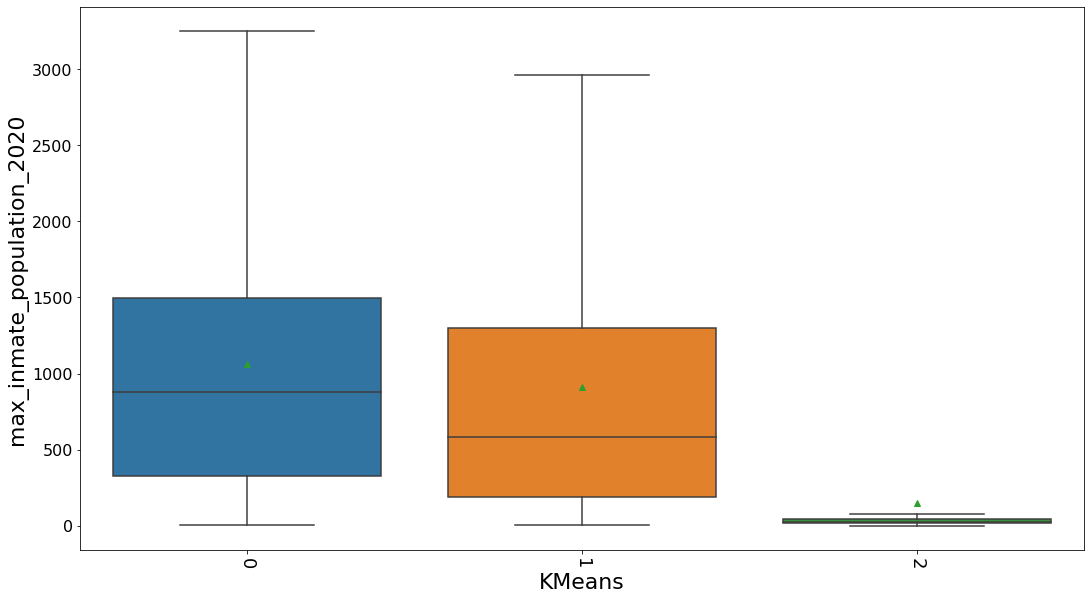

1


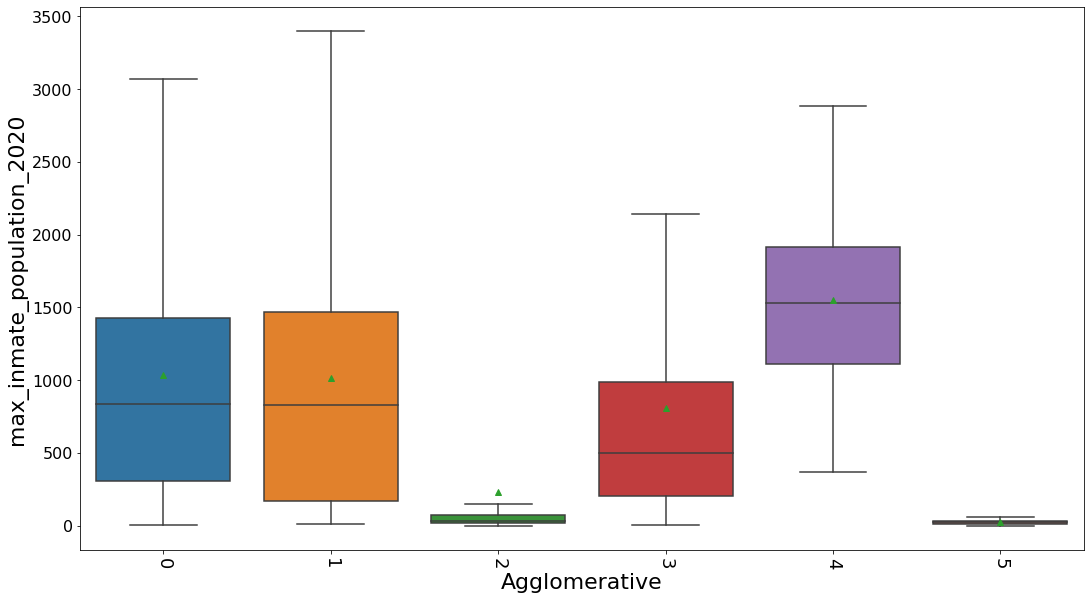

1


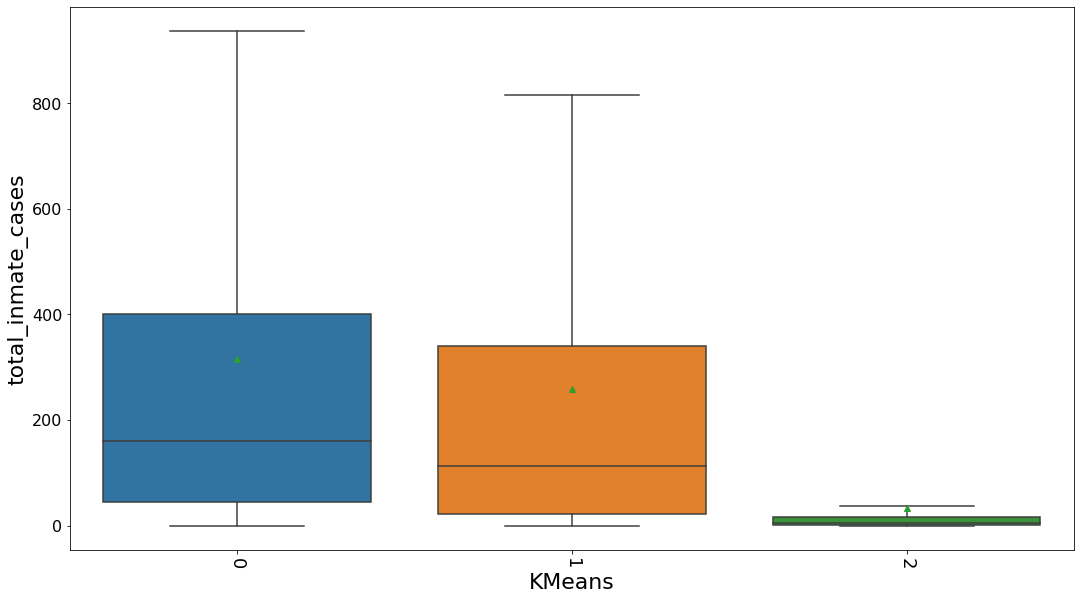

1


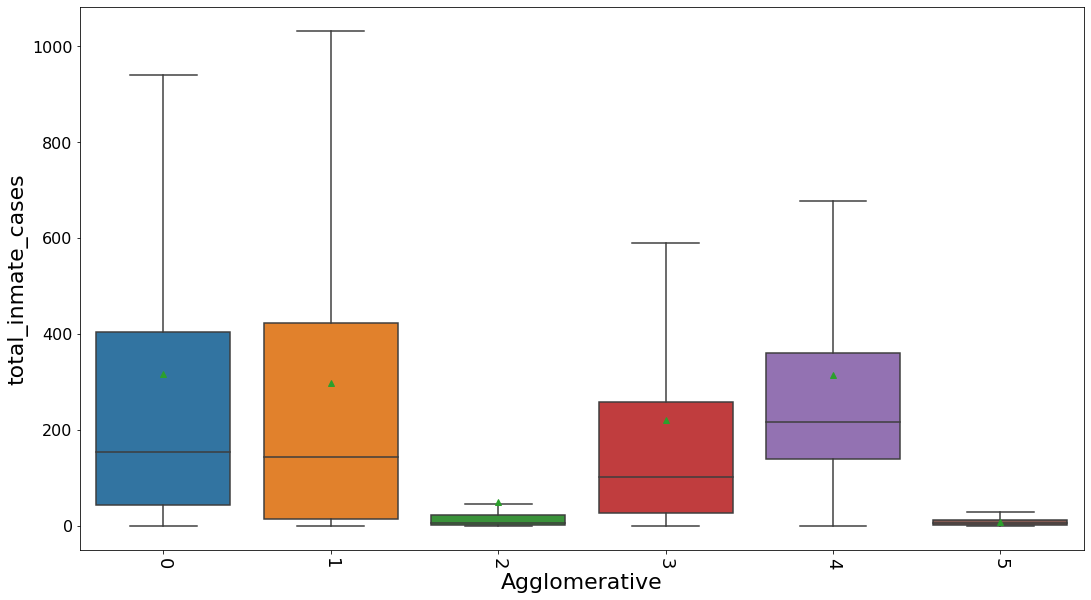

1


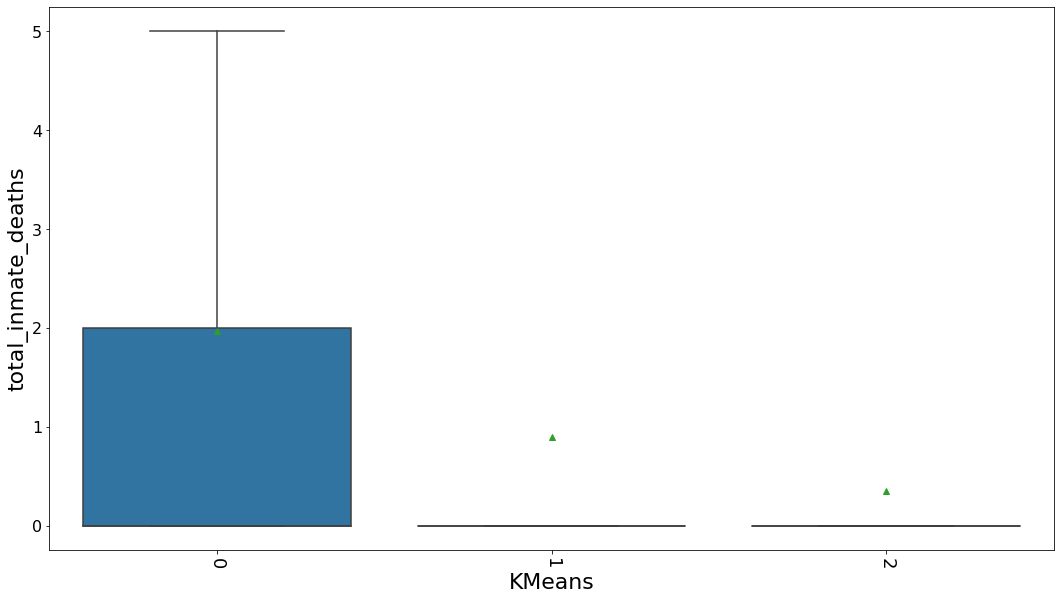

1


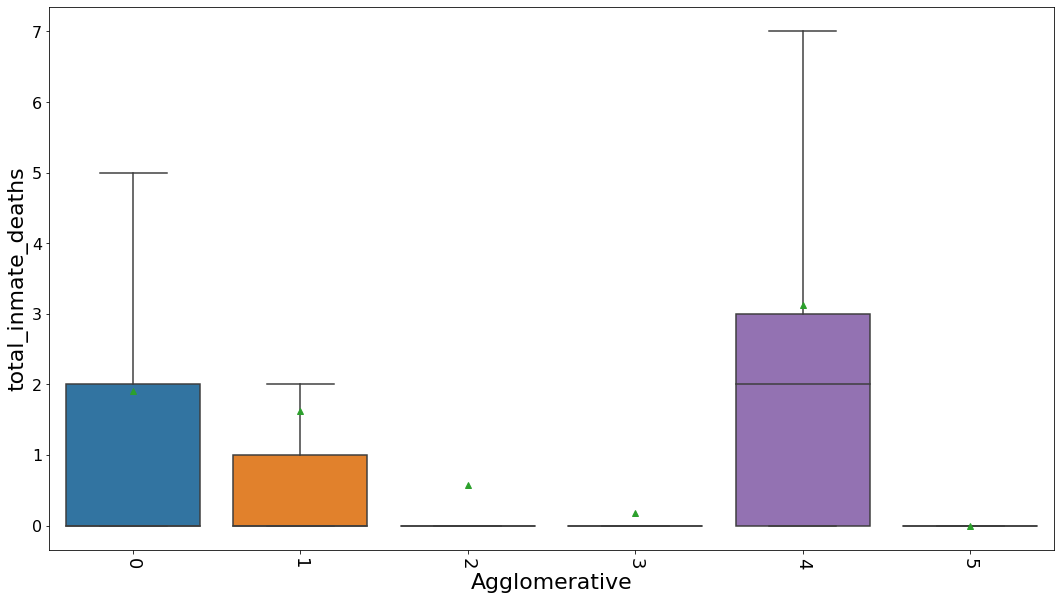

1


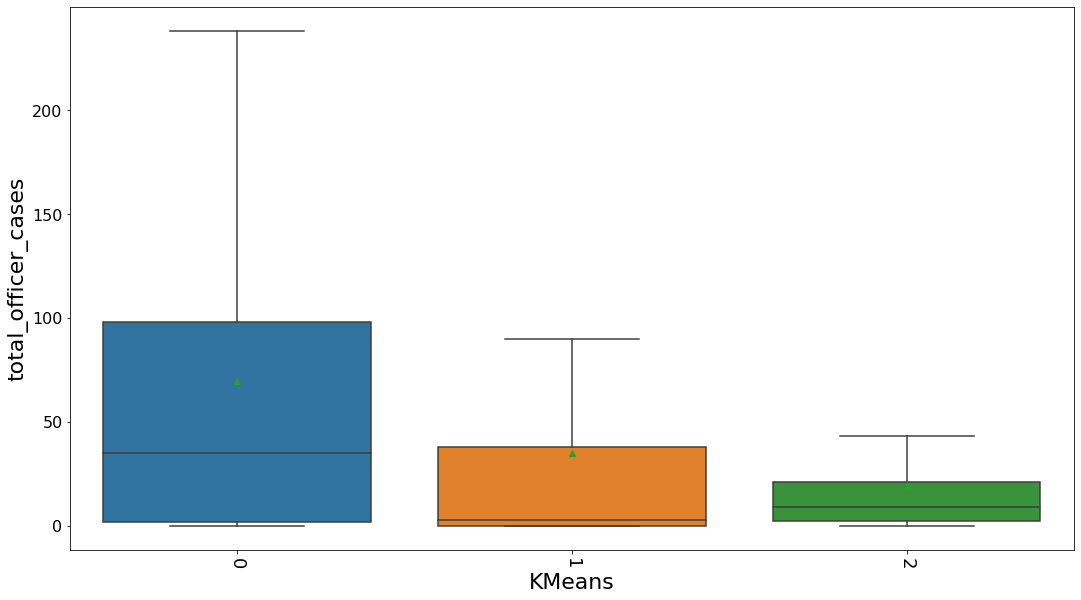

1


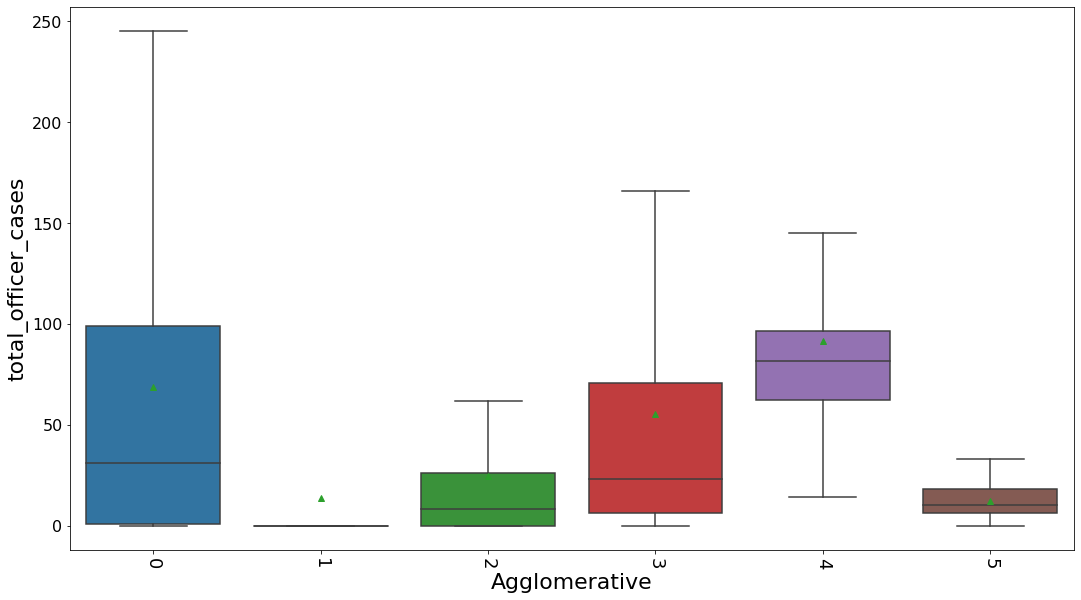

1


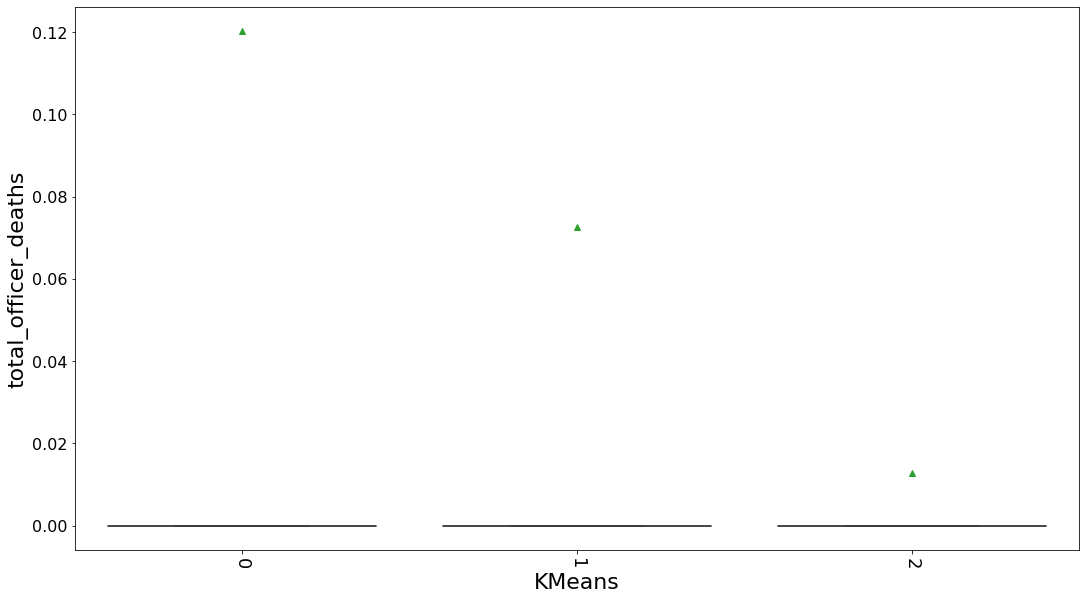

1


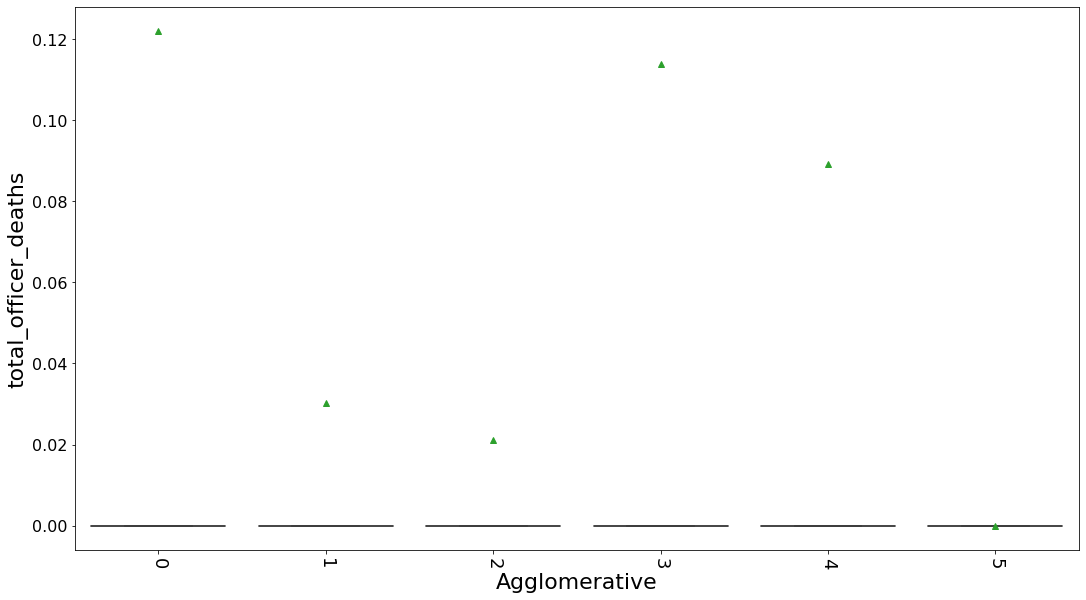

1


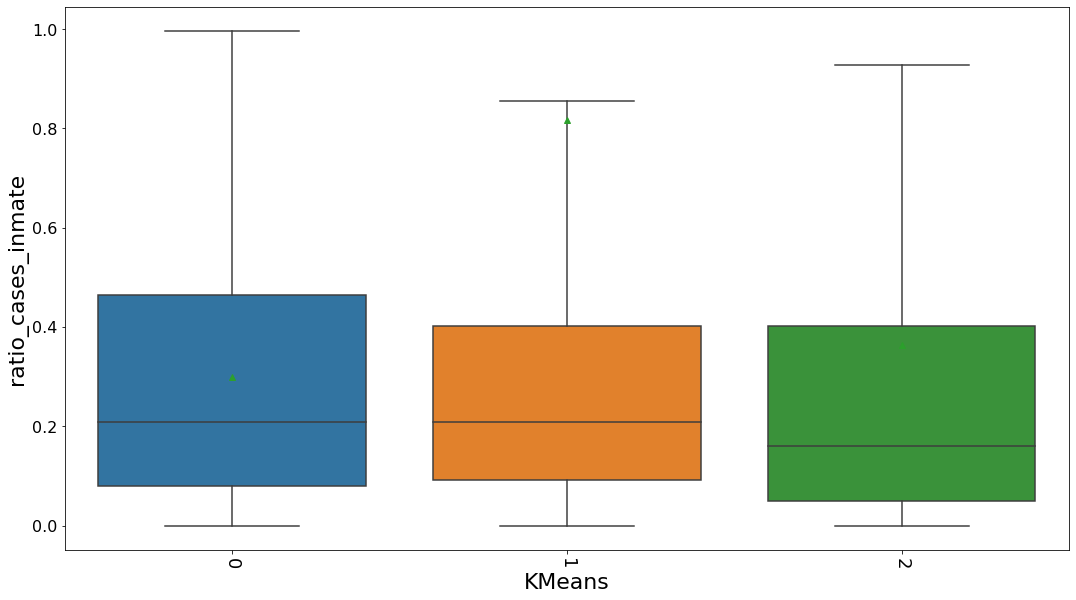

1


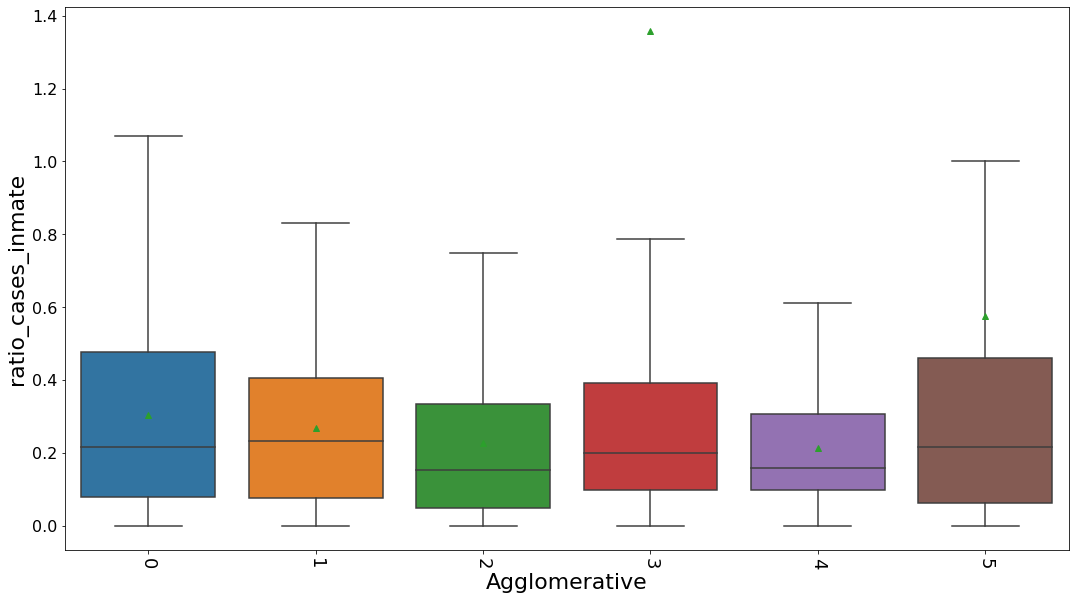

1


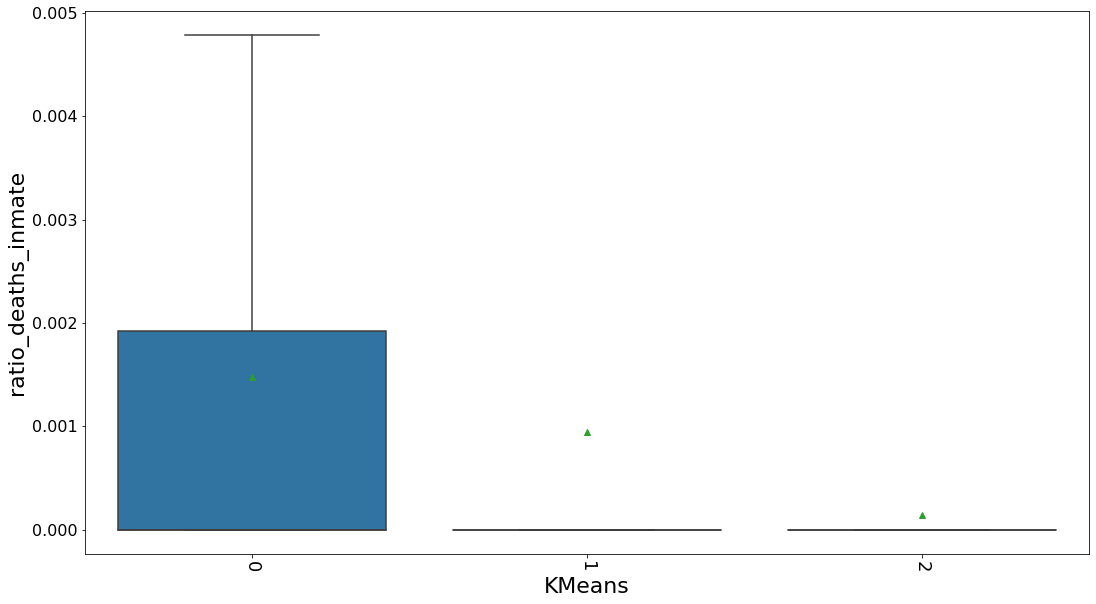

1


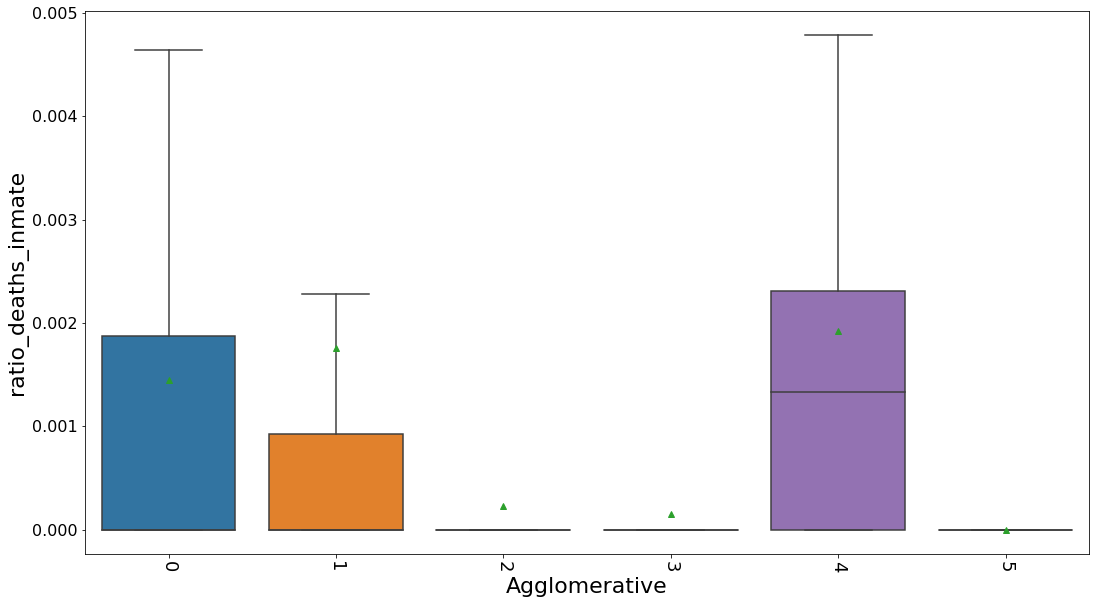

1


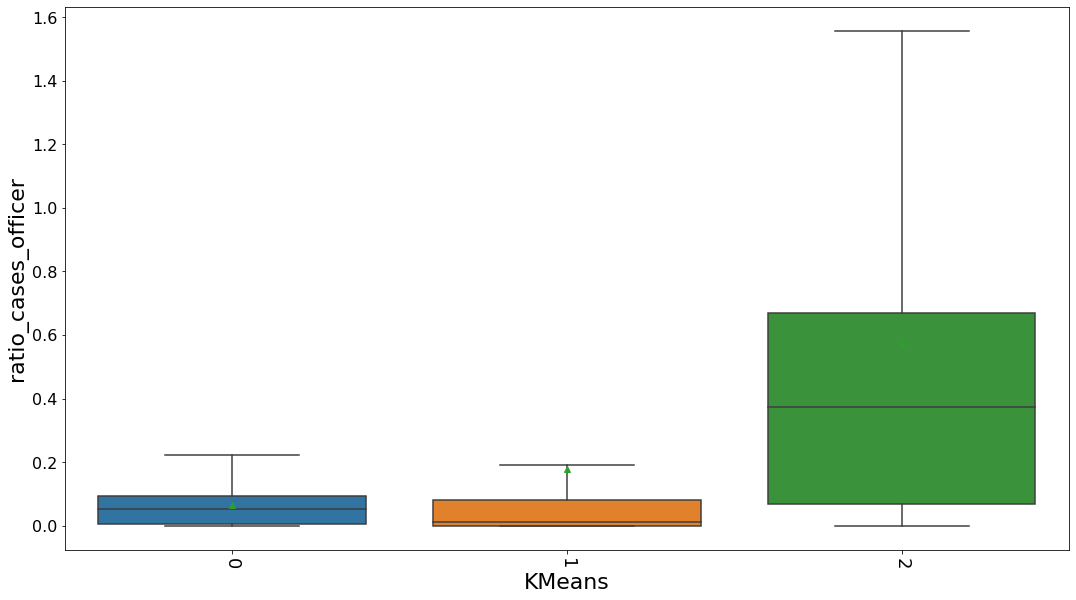

1


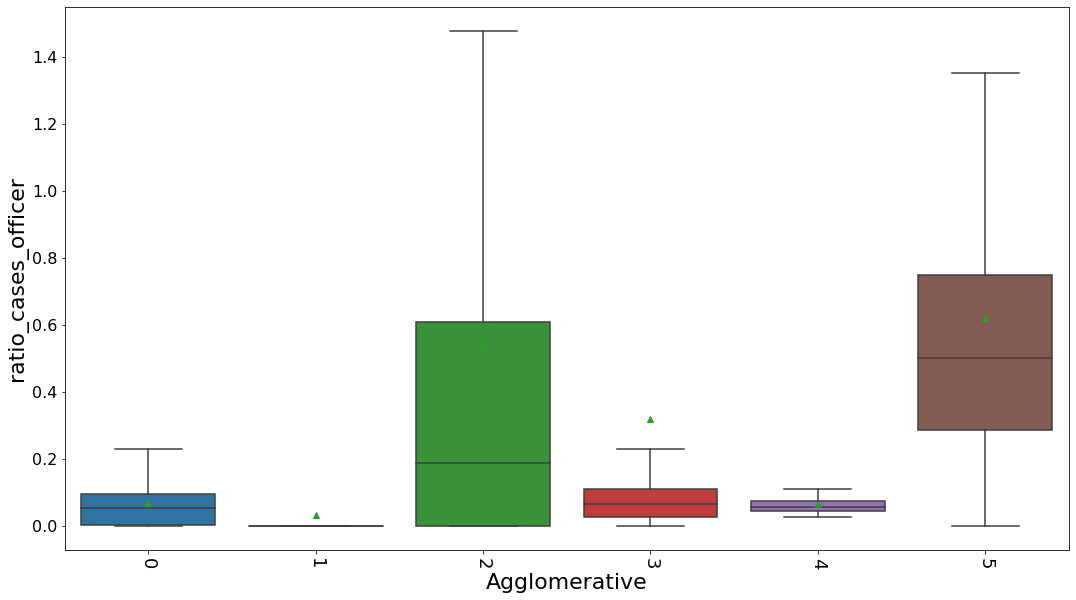

1


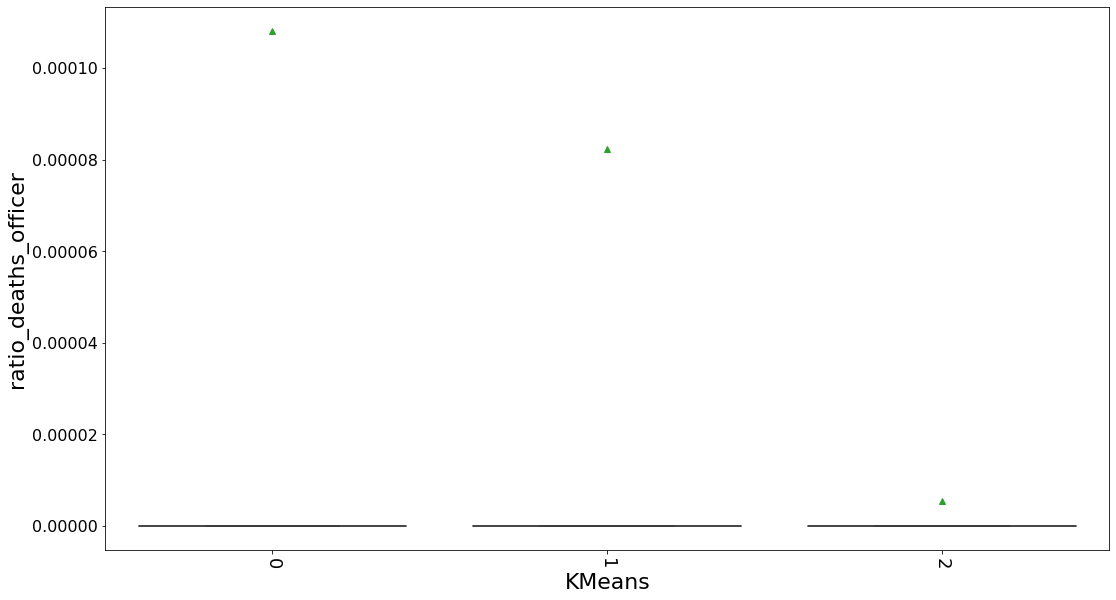

1


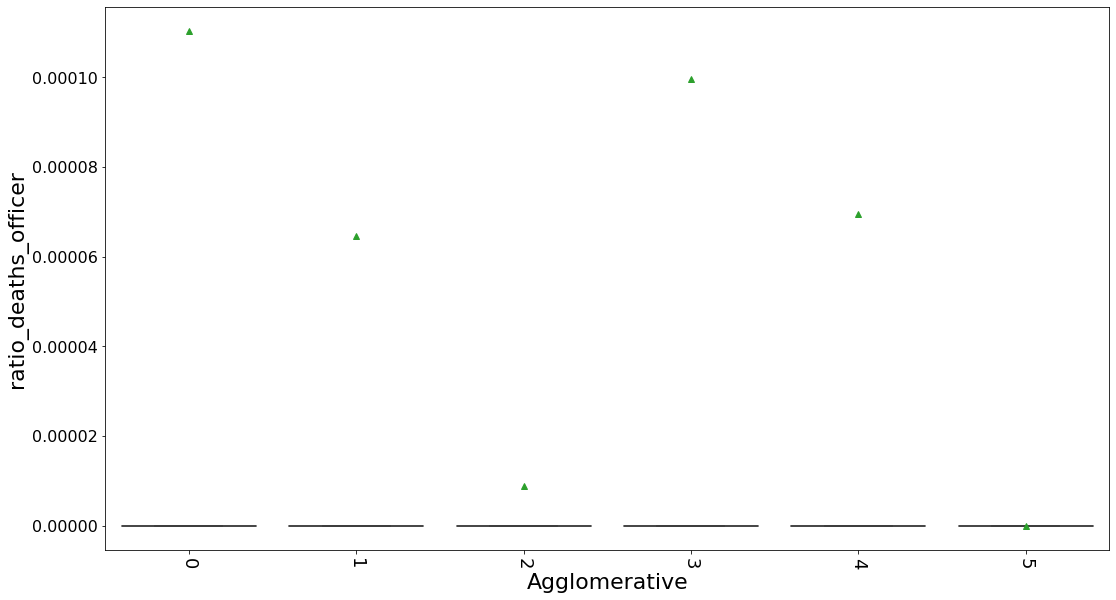

1


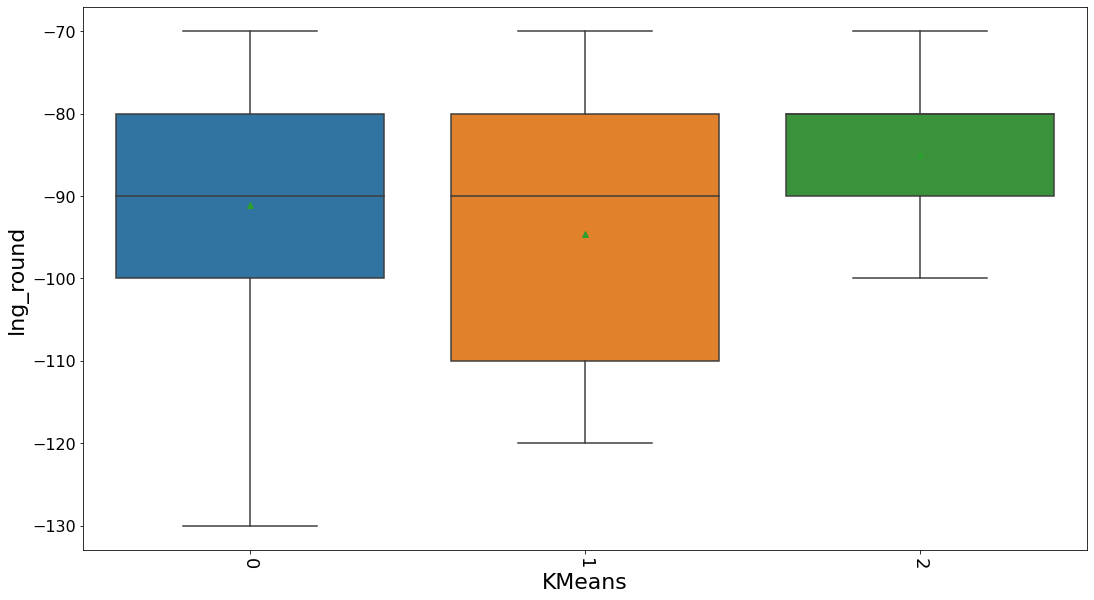

1


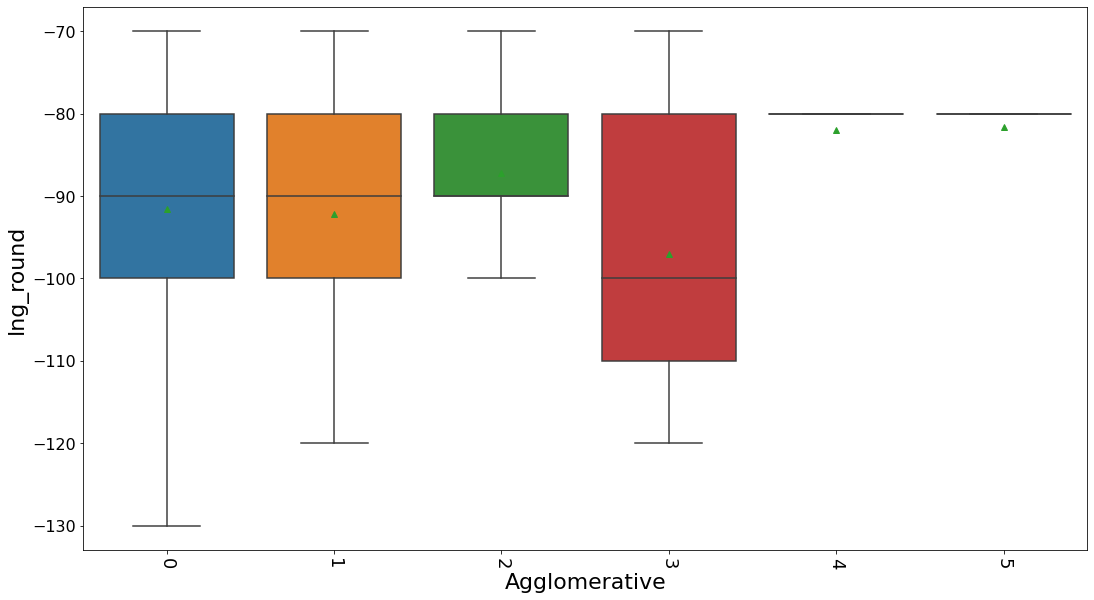

1


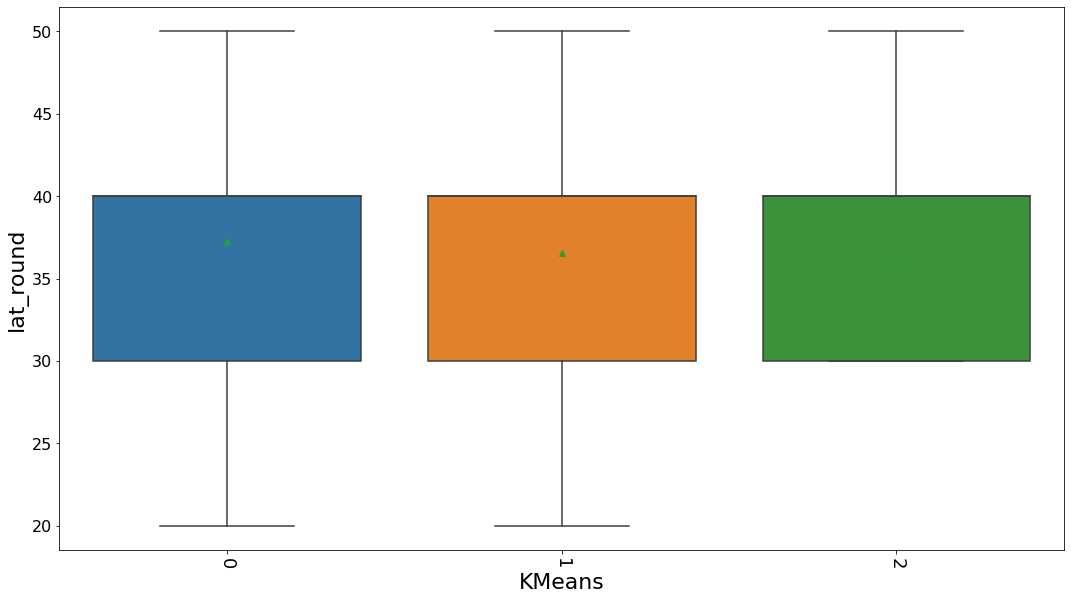

1


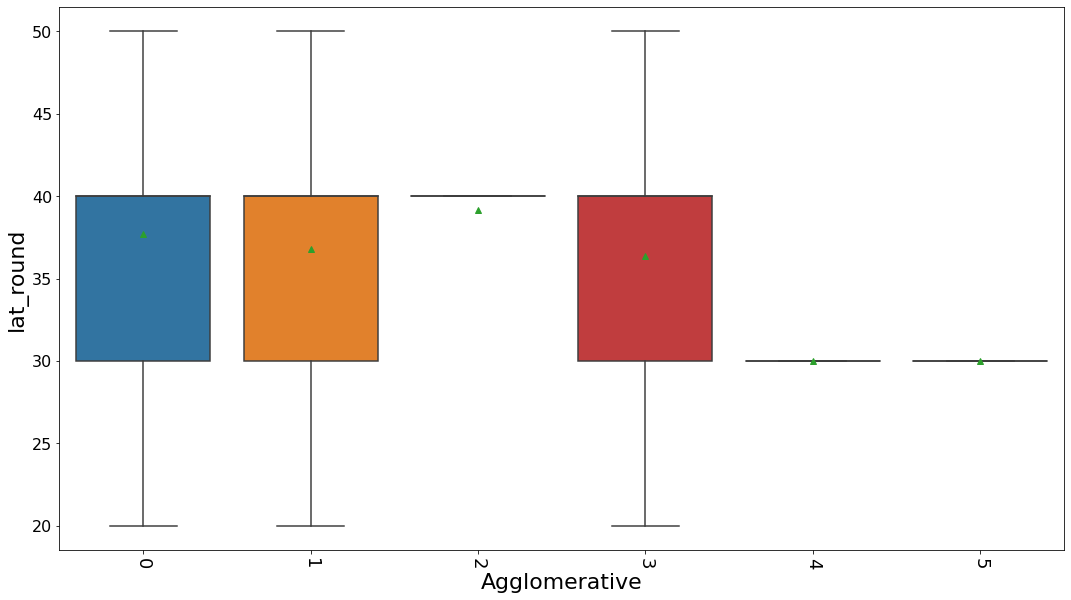

1
capacity_round KMeans


ValueError: Could not interpret input 'capacity_round'

In [135]:
for a_col in data_imputed.columns[:16]:  
    for b_col in data_imputed.columns[-2:]:
        try:
            if a_col != 'facility_type' and a_col != 'facility_state' and a_col != 'area':
                print(1)
                sns.boxplot(x = b_col, y = a_col, data = data, showfliers = False, showmeans = True)
                fig = plt.gcf()
                fig.set_size_inches(18, 10)
                plt.xticks(fontsize = 18, rotation=-90)
                plt.yticks(fontsize = 16)
                plt.xlabel(b_col, fontsize = 22)
                plt.ylabel(a_col, fontsize = 22)
                plt.show()
                
            else:
                b
            
        except:
            print(a_col, b_col)
            sns.catplot(x = b_col, hue = a_col, kind = "count", data = data)
            fig = plt.gcf()
            fig.set_size_inches(18, 10)
            plt.xticks(fontsize = 18, rotation=-90)
            plt.yticks(fontsize = 16)
            plt.xlabel(b_col, fontsize = 22)
            plt.ylabel(a_col, fontsize = 22)
            plt.show()

In [ ]:
# הכנסנו כאן בסוף את הניתוח המקדים שעשינו, כדי לא לקטוע את הרצף של הכנת הנתונים והקלאסטרינג.
# חלק מההחלטות שלנו התבססו על הניתוח שכאן.

facility_name :


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 139 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 147 missing from current font.
 

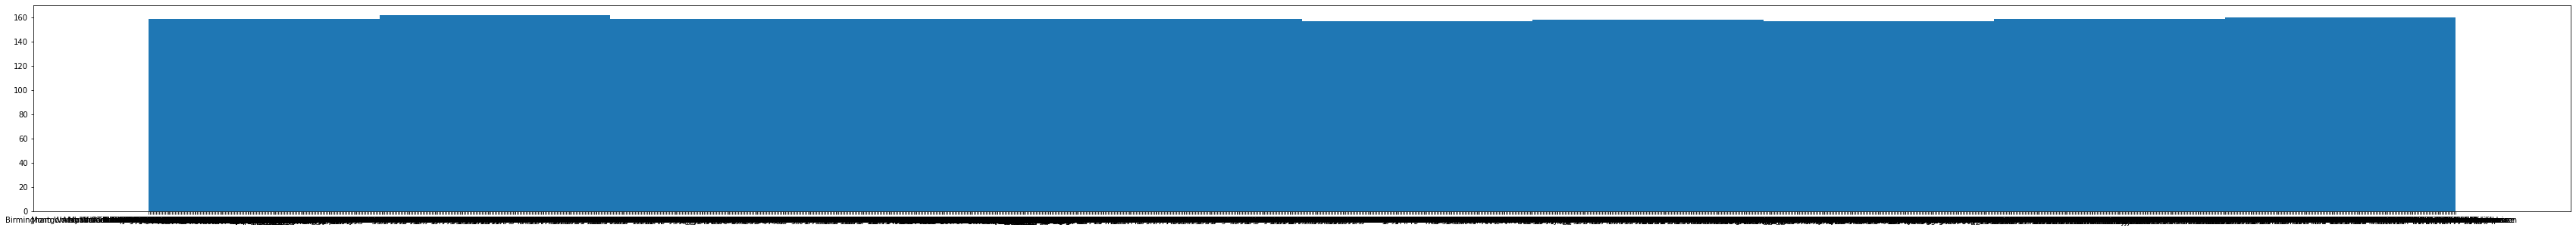

facility_type :


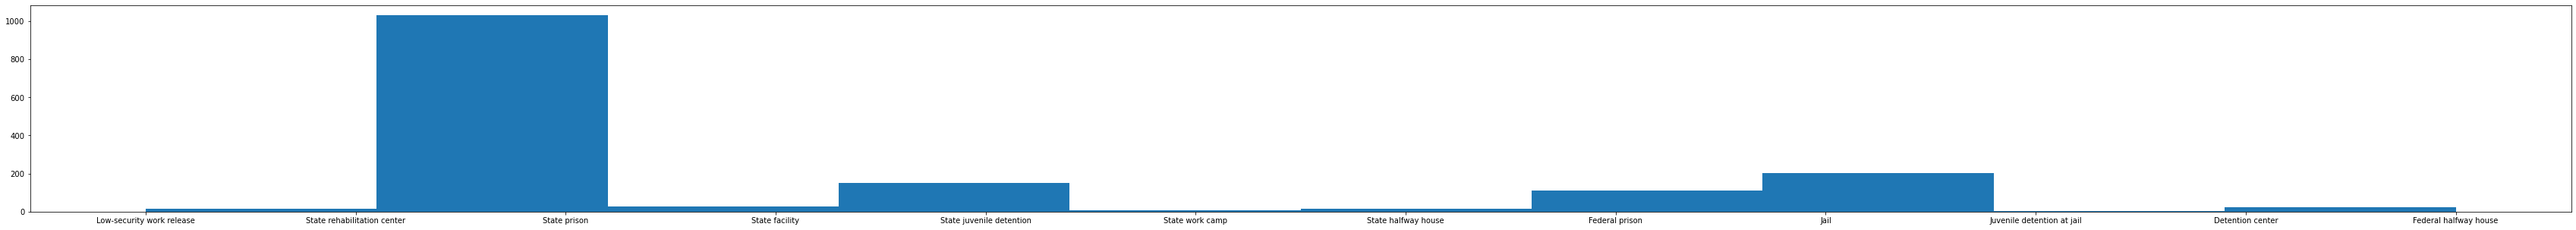

facility_city :


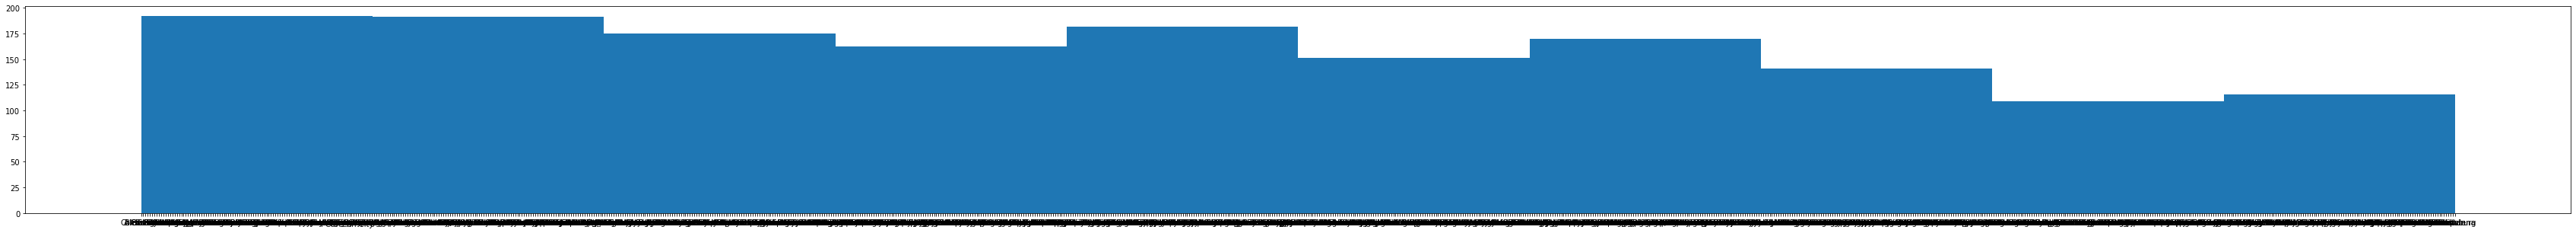

facility_county :


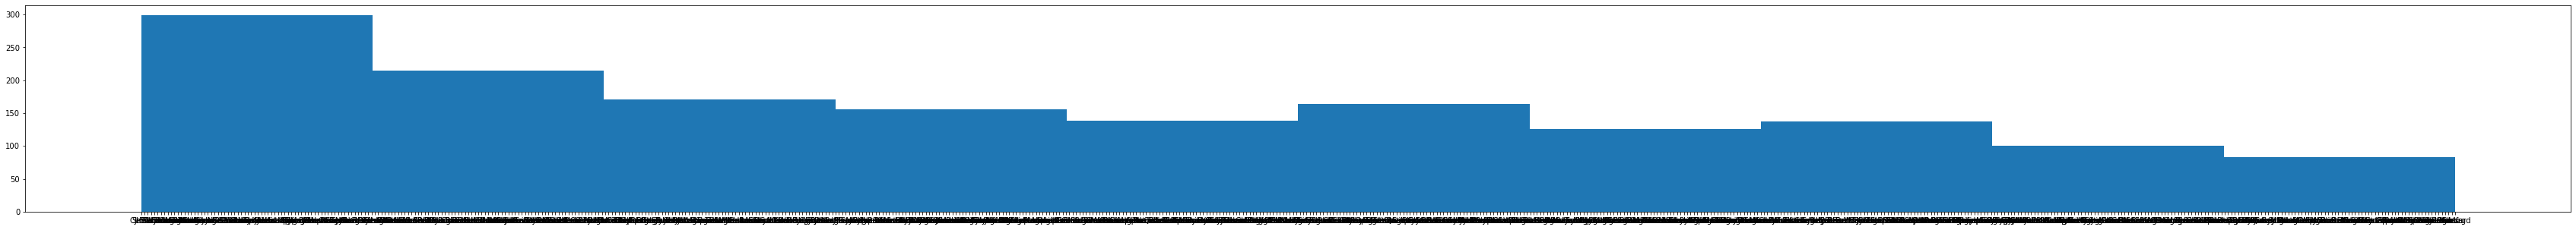

facility_state :


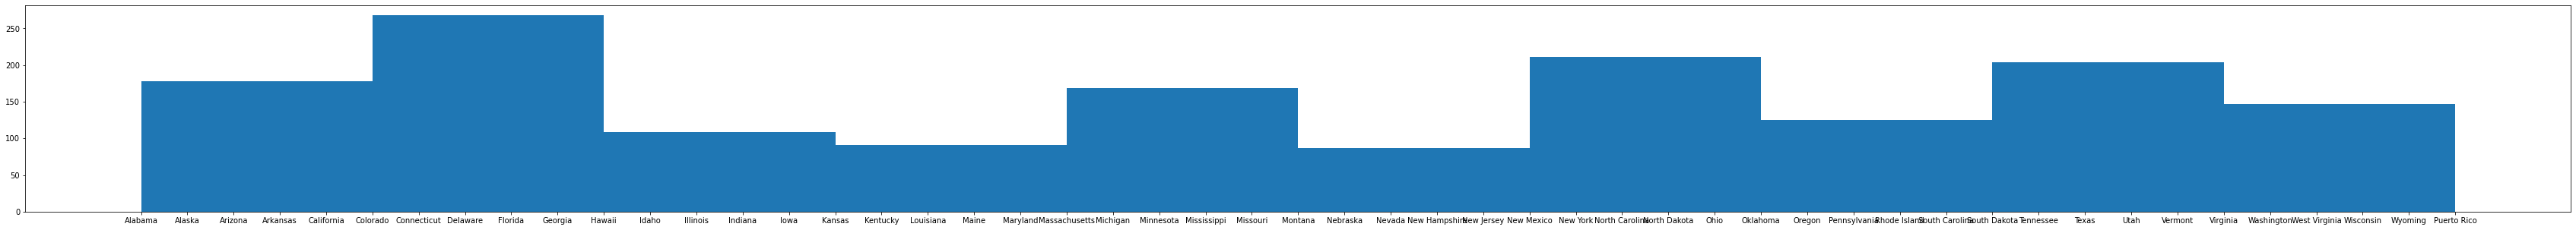

facility_lng :


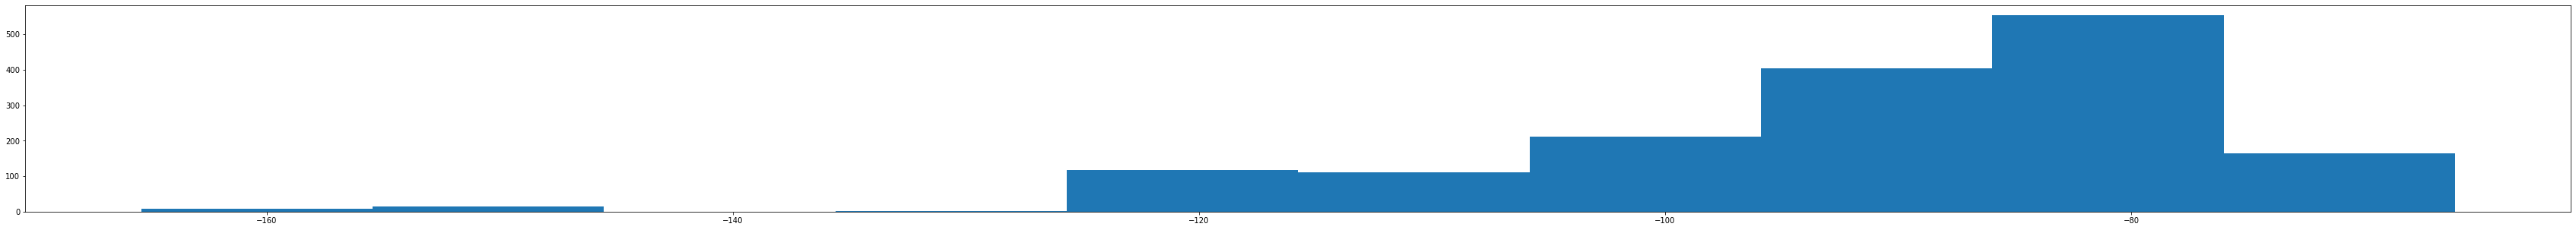

facility_lat :


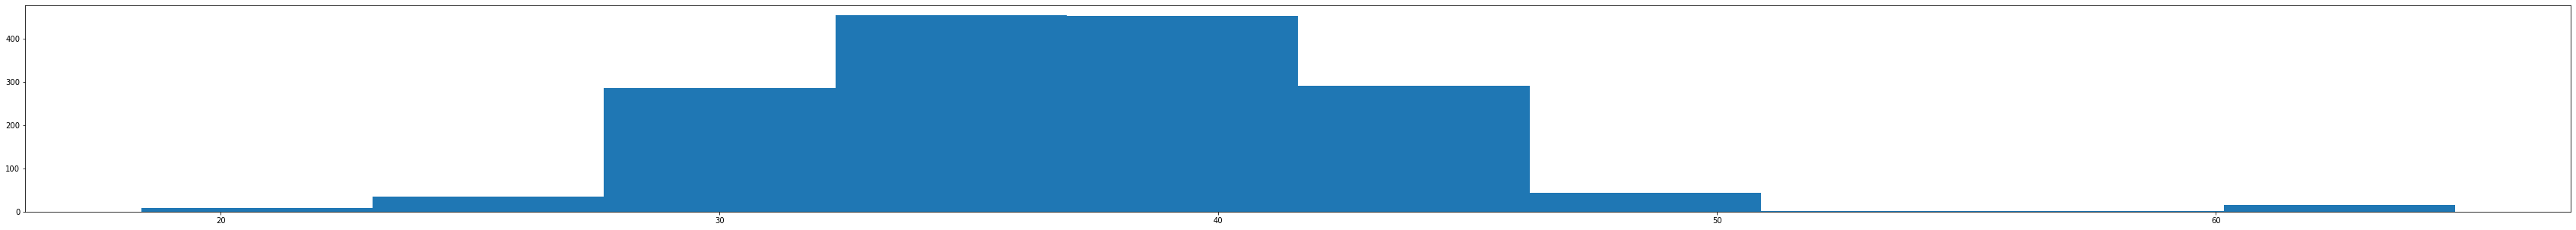

latest_inmate_population :


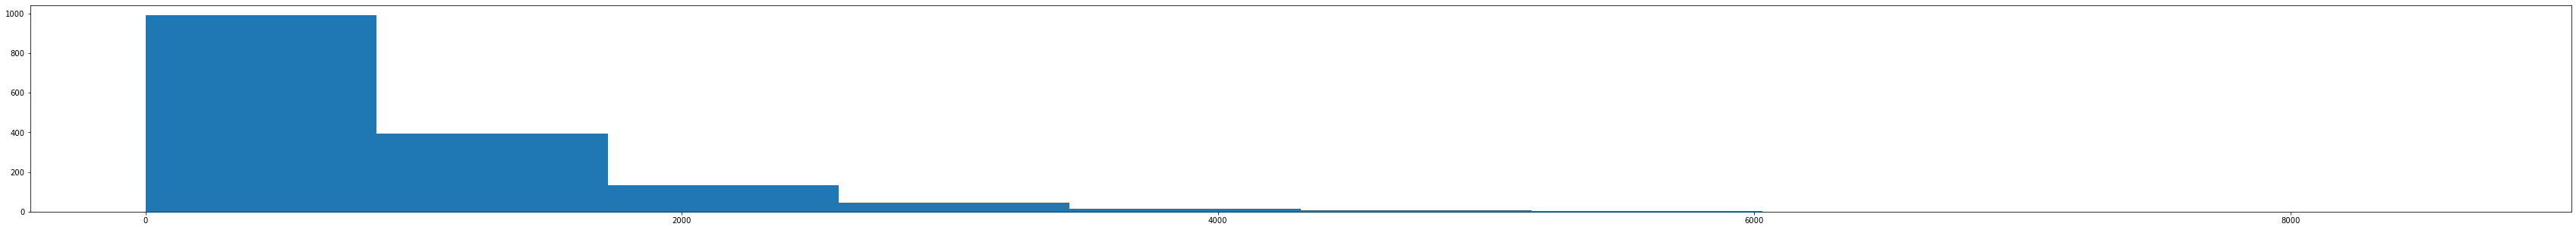

max_inmate_population_2020 :


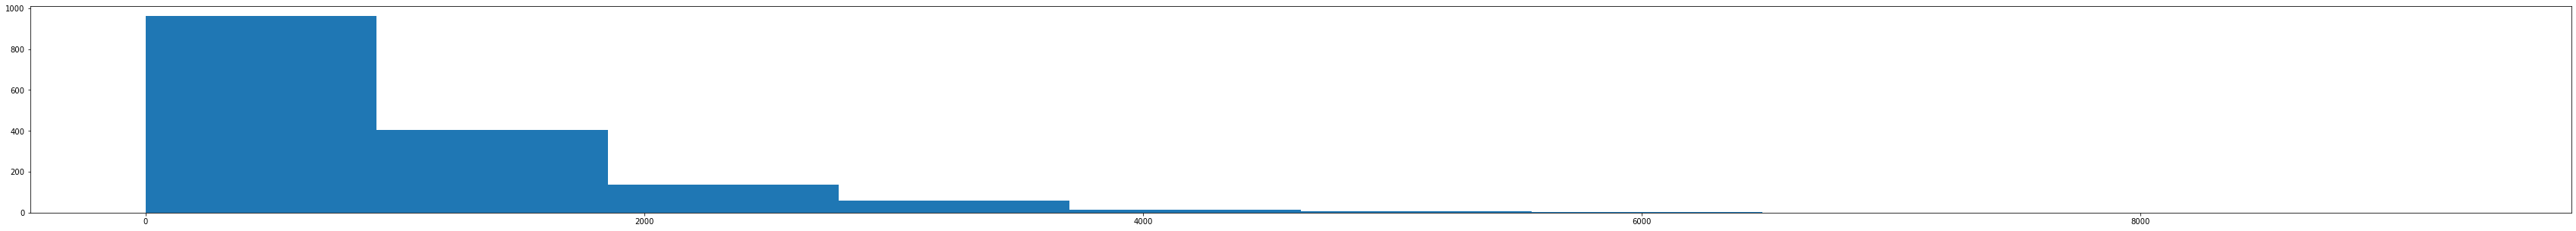

total_inmate_cases :


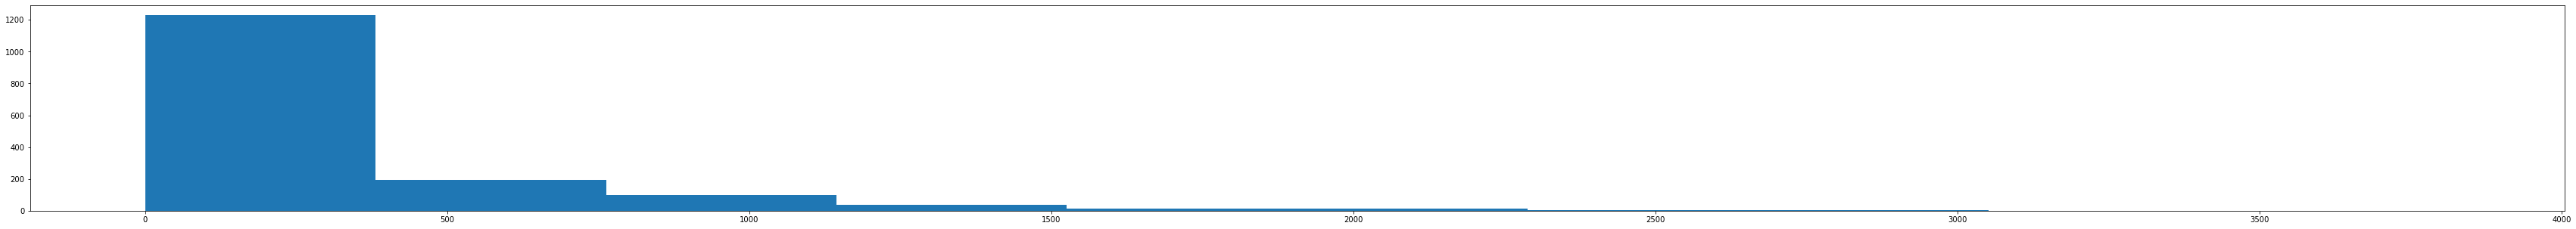

total_inmate_deaths :


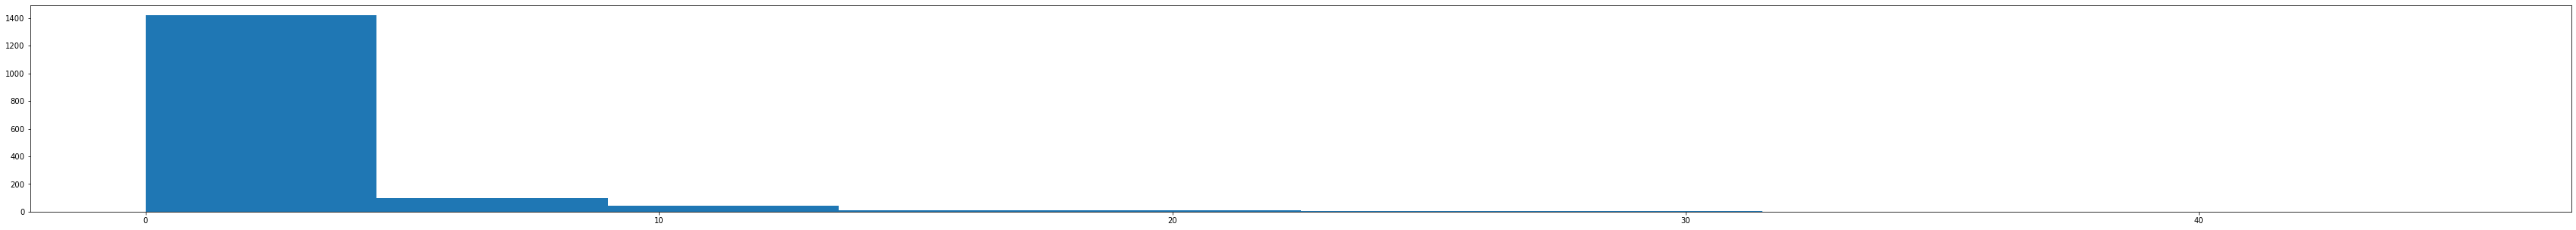

total_officer_cases :


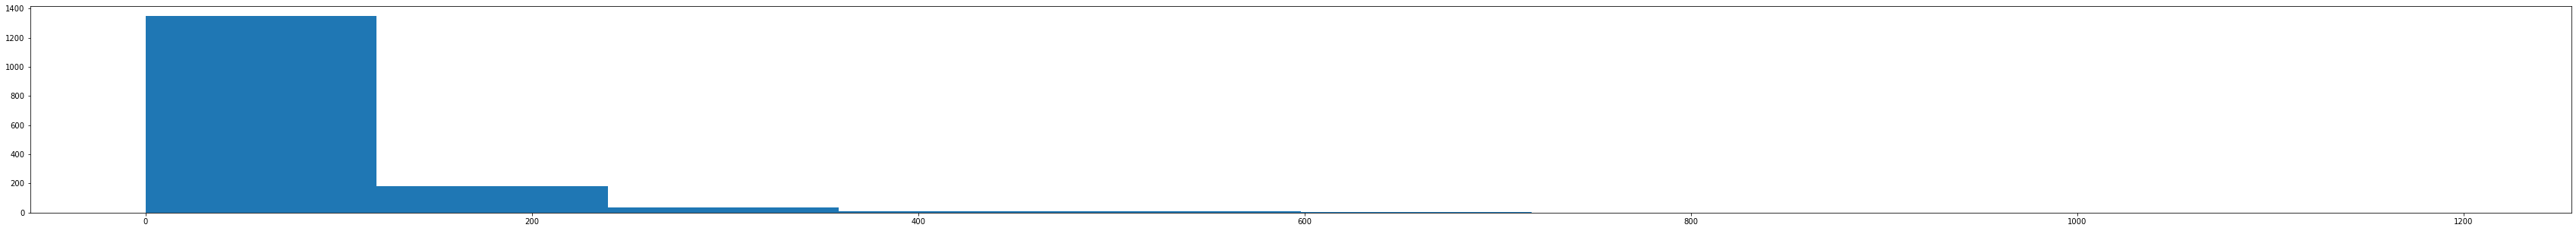

total_officer_deaths :


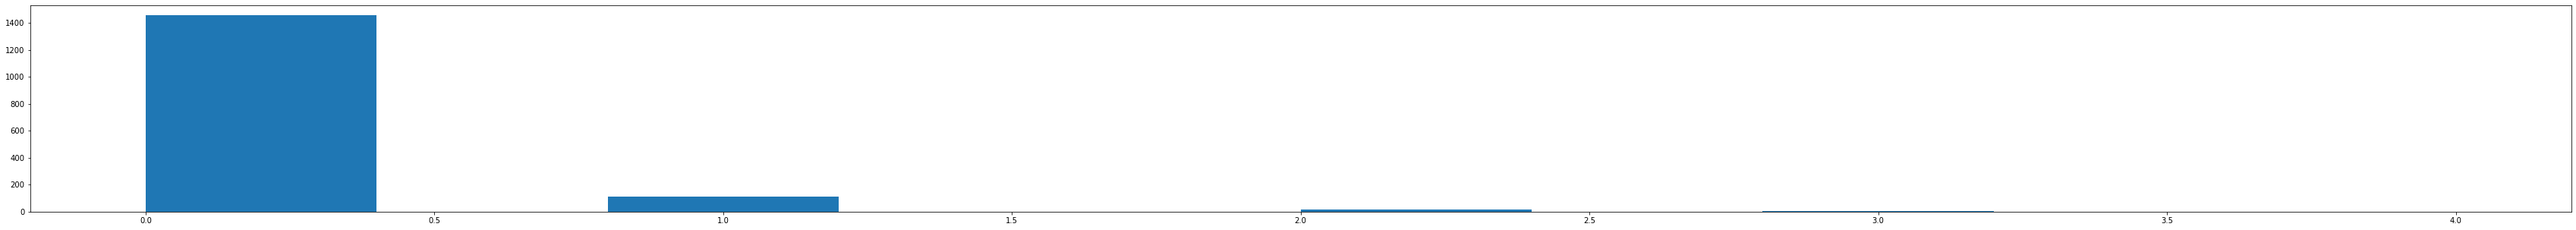

ratio_cases_inmate :


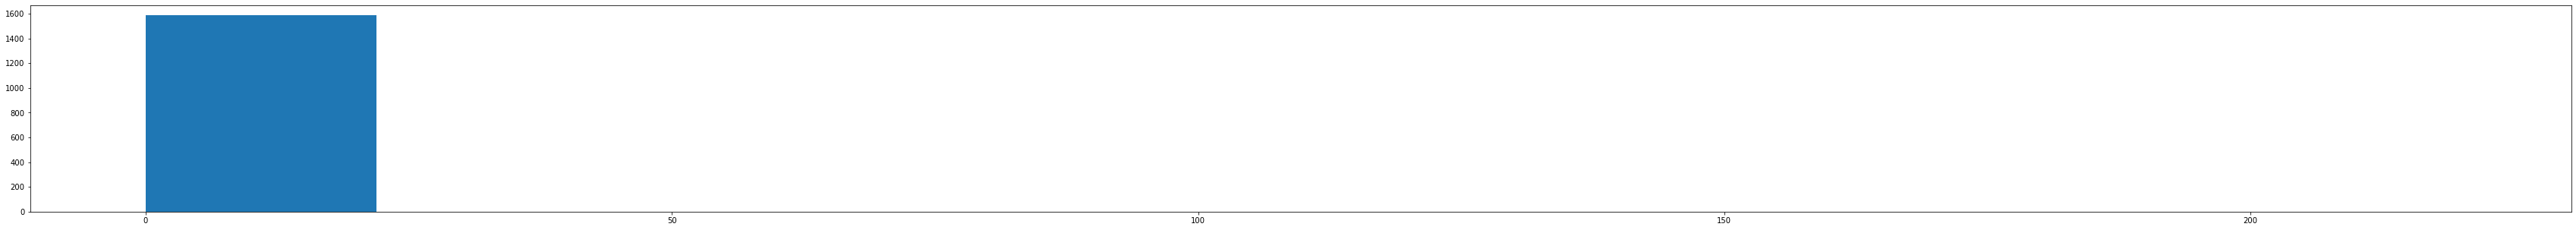

ratio_deaths_inmate :


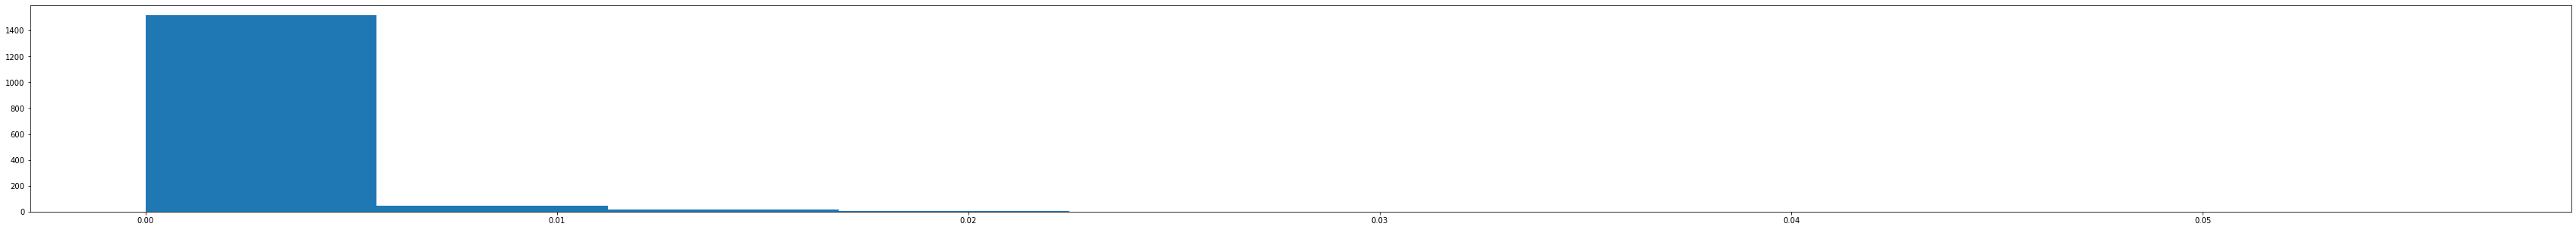

ratio_cases_officer :


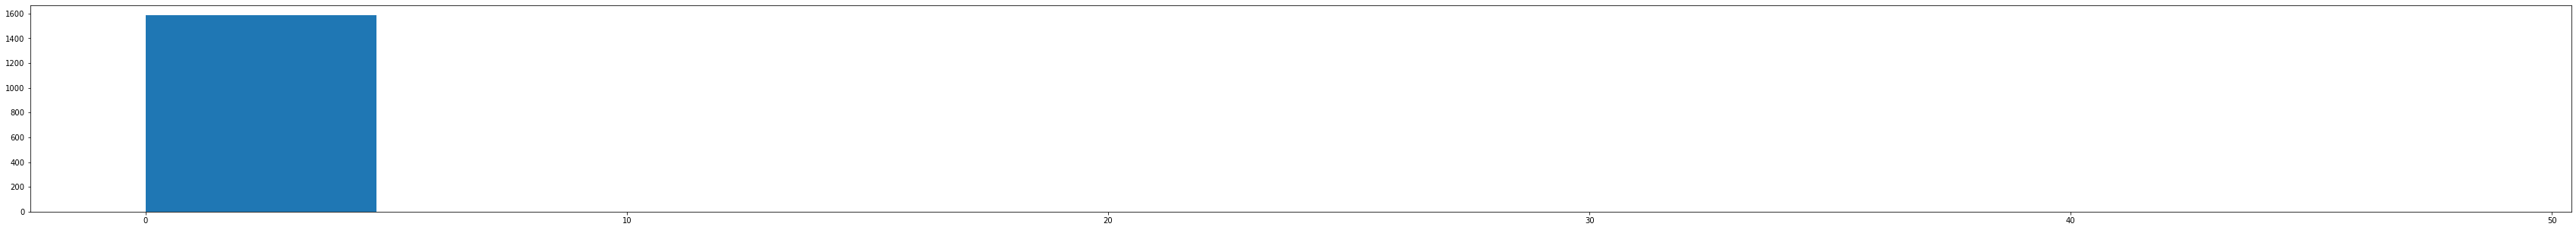

ratio_deaths_officer :


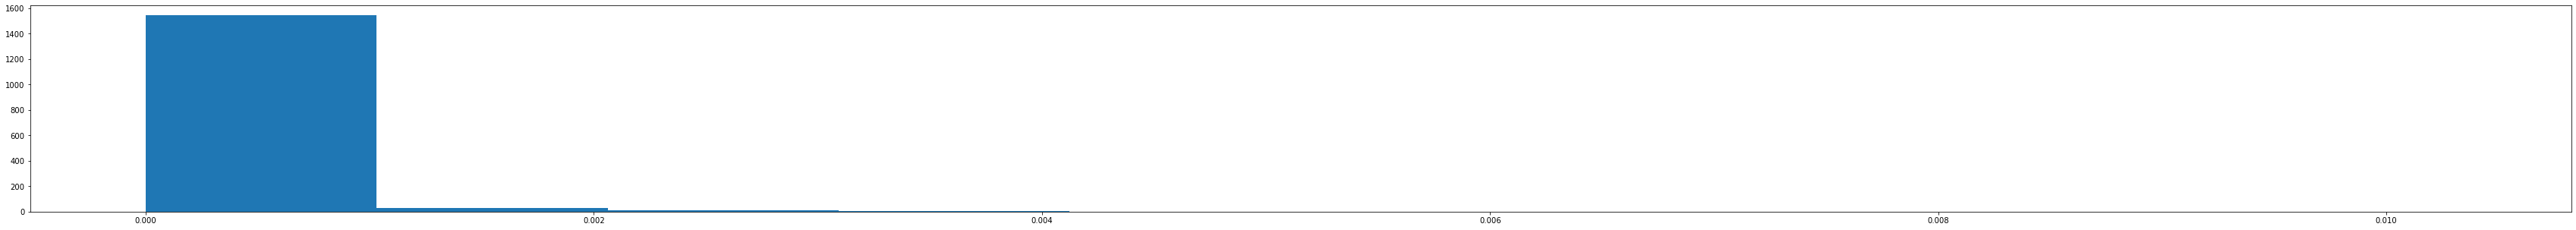

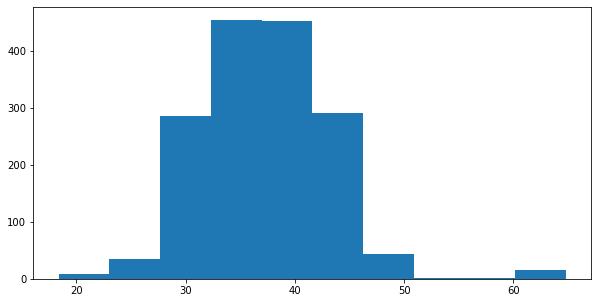

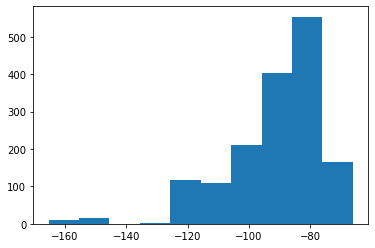

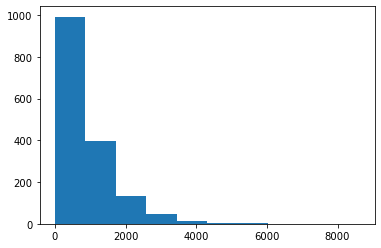

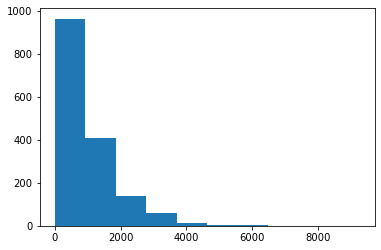

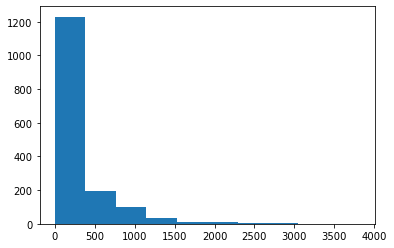

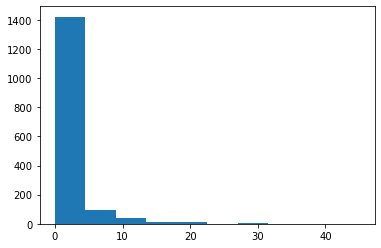

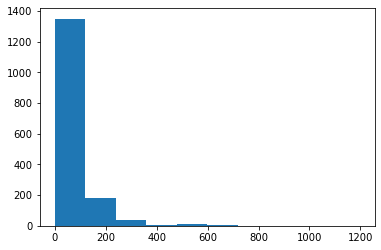

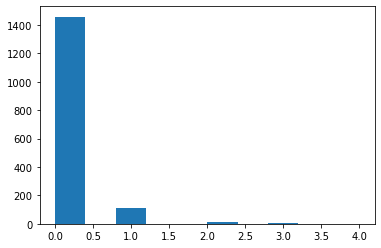

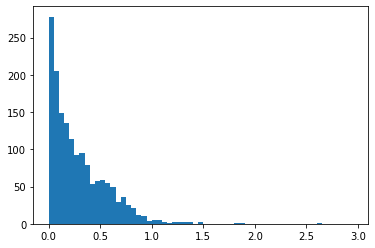

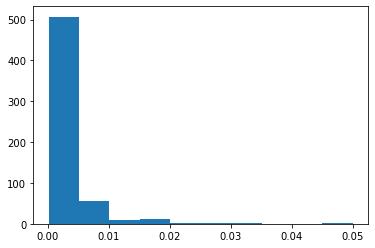

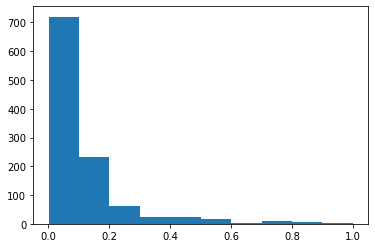

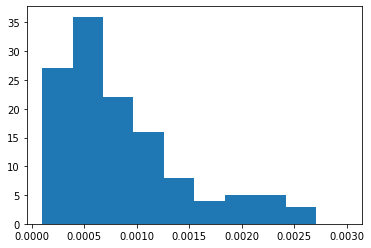

confusion_matrix for  facility_name  and  latest_inmate_population :
latest_inmate_population                       0 - 1000  1000 - 2000  \
facility_name                                                          
Adams Youth Services Center                           1            0   
Adirondack Correctional Facility                      1            0   
Adult Diagnostic and Treatment Center prison          1            0   
Airway Heights Corrections Center                     0            1   
Alabama Therapeutic Education Facility prison         1            0   
...                                                 ...          ...   
Youth Environmental Services center                   1            0   
Yukon Kuskokwim Correctional Center                   1            0   
Yuma County jail                                      1            0   
Zephyrhills Correctional Institution                  1            0   
âJoliet Treatment Center                            1            

ratio_cases_officer                            0  0.0 - 0.1  0.1 - 0.2  \
facility_name                                                            
Adams Youth Services Center                    0          0          0   
Adirondack Correctional Facility               1          0          0   
Adult Diagnostic and Treatment Center prison   0          0          1   
Airway Heights Corrections Center              0          1          0   
Alabama Therapeutic Education Facility prison  0          1          0   
...                                           ..        ...        ...   
Youth Environmental Services center            0          0          0   
Yukon Kuskokwim Correctional Center            1          0          0   
Yuma County jail                               0          0          0   
Zephyrhills Correctional Institution           0          0          1   
âJoliet Treatment Center                     0          0          0   

ratio_cases_officer                  

total_inmate_cases  0 - 400  1200 - 1500  1500 - up  400 - 800  800 - 1200
facility_city                                                             
Abbeville                 1            0          0          0           0
Aberdeen                  0            1          0          0           0
Abilene                   1            1          0          1           0
Adrian                    0            1          0          0           0
Aiea                      0            0          0          1           0
...                     ...          ...        ...        ...         ...
York                      1            0          0          0           0
Youngstown                2            0          0          0           0
Ypsilanti                 0            0          0          1           0
Yuma                      1            0          0          0           0
Zephyrhills               1            0          0          0           0

[1034 rows x 5 columns]


total_inmate_deaths  0 _ 5  10 _ 15  15 _ up  5 _ 10
facility_county                                     
Ada                      7        0        0       0
Adams                    2        0        0       0
Alachua                  2        0        0       0
Alameda                  2        0        0       0
Albany                   1        0        0       0
...                    ...      ...      ...     ...
Yankton                  2        0        0       0
Yazoo                    2        0        0       0
Yellowstone              3        0        0       0
York                     1        0        0       0
Yuma                     1        0        0       1

[694 rows x 4 columns]
confusion_matrix for  facility_county  and  total_officer_cases :
total_officer_cases  0 - 100  100 - 220  220 - 380  380 - up
facility_county                                             
Ada                        6          1          0         0
Adams                      2          

total_officer_deaths    0   1  2  3 - up
facility_state                          
Alabama                38   1  1       0
Alaska                 18   0  0       0
Arizona                24   0  0       0
Arkansas               25   1  0       0
California             49  17  3       1
Colorado               32   1  1       0
Connecticut            15   0  0       0
Delaware                8   0  0       0
Florida               117   5  1       0
Georgia                83   5  0       0
Hawaii                  8   0  0       0
Idaho                  15   0  0       0
Illinois               45   0  0       0
Indiana                22   4  0       0
Iowa                   13   2  0       0
Kansas                  8   4  1       0
Kentucky               19   3  1       0
Louisiana              11   0  1       2
Maine                   6   0  0       0
Maryland               31   3  1       0
Massachusetts          32   0  0       0
Michigan               34   2  0       0
Minnesota       

-80 _ -66            154        103         48         16          8        11
confusion_matrix for  facility_lng  and  ratio_deaths_officer :
ratio_deaths_officer    0  0.0 - 0.0005  0.0005 - 0.001  0.001 - 0.002  \
facility_lng                                                             
-100 _ -80            825            21              32             21   
-125 _ -100           278            20               7              7   
-165 _ -125            26             0               0              0   
-80 _ -66             329             5               2              1   

ratio_deaths_officer  0.002 - 0.003  0.003 - up  
facility_lng                                     
-100 _ -80                        6           4  
-125 _ -100                       2           0  
-165 _ -125                       0           0  
-80 _ -66                         2           1  
confusion_matrix for  facility_lat  and  latest_inmate_population :
latest_inmate_population  0 - 1000  1000 - 2

confusion_matrix for  max_inmate_population_2020  and  ratio_deaths_officer :
ratio_deaths_officer          0  0.0 - 0.0005  0.0005 - 0.001  0.001 - 0.002  \
max_inmate_population_2020                                                     
0 - 1000                    966             0               0             25   
1000 - 2000                 360             0              34              3   
2000 - 3000                  87            30               4              1   
3000 - 4000                  32            11               2              0   
4000 - up                    13             5               1              0   

ratio_deaths_officer        0.002 - 0.003  0.003 - up  
max_inmate_population_2020                             
0 - 1000                               10           5  
1000 - 2000                             0           0  
2000 - 3000                             0           0  
3000 - 4000                             0           0  
4000 - up                

ratio_deaths_inmate    0  0.0 - 0.001  0.001 - 0.002  0.002 - up
total_inmate_deaths                                             
0 _ 5                999          131            154         137
10 _ 15                0            0              0          36
15 _ up                0            0              0          23
5 _ 10                 0            3             17          89
confusion_matrix for  total_inmate_deaths  and  ratio_cases_officer :
ratio_cases_officer    0  0.0 - 0.1  0.1 - 0.2  0.2 - 0.3  0.3 - 0.6  0.6 - up
total_inmate_deaths                                                           
0 _ 5                433        624        195         58         64        47
10 _ 15                7         13         13          2          1         0
15 _ up                2         15          5          1          0         0
5 _ 10                19         66         23          1          0         0
confusion_matrix for  total_inmate_deaths  and  ratio_deaths_offic

3 - up                      0          2          2         0
confusion_matrix for  total_officer_deaths  and  ratio_cases_inmate :
ratio_cases_inmate    0 - 0.2  0.2 - 0.4  0.4 - 0.6  0.6 - 0.8  0.8 - 1  \
total_officer_deaths                                                      
0                         719        344        200        127       40   
1                          43         30         18         12        6   
2                           3          6          4          1        1   
3 - up                      2          0          1          1        0   

ratio_cases_inmate    1 - up  
total_officer_deaths          
0                         28  
1                          3  
2                          0  
3 - up                     0  
confusion_matrix for  total_officer_deaths  and  ratio_deaths_inmate :
ratio_deaths_inmate     0  0.0 - 0.001  0.001 - 0.002  0.002 - up
total_officer_deaths                                             
0                     962   

latest_inmate_population  0 - 1000  1000 - 2000  2000 - 3000  3000 - 4000  \
ratio_deaths_inmate                                                         
0                              864          115           17            3   
0.0 - 0.001                     17           70           31           10   
0.001 - 0.002                   66           77           18            6   
0.002 - up                     141          100           35            6   

latest_inmate_population  4000 - up  
ratio_deaths_inmate                  
0                                 0  
0.0 - 0.001                       6  
0.001 - 0.002                     4  
0.002 - up                        3  
confusion_matrix for  ratio_deaths_inmate  and  max_inmate_population_2020 :
max_inmate_population_2020  0 - 1000  1000 - 2000  2000 - 3000  3000 - 4000  \
ratio_deaths_inmate                                                           
0                                826          141           21           1

confusion_matrix for  ratio_cases_officer  and  ratio_deaths_inmate :
ratio_deaths_inmate    0  0.0 - 0.001  0.001 - 0.002  0.002 - up
ratio_cases_officer                                             
0                    331           38             34          58
0.0 - 0.1            396           67            101         154
0.1 - 0.2            118           26             32          60
0.2 - 0.3             47            3              3           9
0.3 - 0.6             61            0              1           3
0.6 - up              46            0              0           1
confusion_matrix for  ratio_cases_officer  and  ratio_deaths_officer :
ratio_deaths_officer    0  0.0 - 0.0005  0.0005 - 0.001  0.001 - 0.002  \
ratio_cases_officer                                                      
0                     457             0               1              1   
0.0 - 0.1             637            30              29             17   
0.1 - 0.2             202            12    

NameError: name 'chi2_contingency' is not defined

In [140]:
mydata = pd.read_csv("after_clean.csv")
mydata2 = pd.read_csv("facilities.csv")

mydata = mydata.drop(columns = ['nyt_id' , 'facility_county_fips'])

# יש עדיין שורות עם נאלים. אני זורק אותן
mydata = mydata.dropna(subset = mydata.columns[:-2].values)



# add relevant features
mydata['ratio_cases_inmate'] = mydata['total_inmate_cases'] / mydata['max_inmate_population_2020']
mydata['ratio_deaths_inmate'] = mydata['total_inmate_deaths'] / mydata['max_inmate_population_2020']
mydata['ratio_cases_officer'] = mydata['total_officer_cases'] / mydata['max_inmate_population_2020']
mydata['ratio_deaths_officer'] = mydata['total_officer_deaths'] / mydata['max_inmate_population_2020']

mydata_convert = mydata.copy()

# histogram for every feature
for i in mydata.drop(columns = ['capacity' , 'capacity_nan']).columns.values:
    print(i , ':')
    plt.gcf().set_size_inches(60 ,5)
    plt.hist(mydata[i])
    plt.show()


# kolmodorov smirnov test for some features

# stats.kstest(mydata['facility_type'].value_counts().values, 'expon')    
# stats.kstest(mydata['facility_type'].value_counts().values, 'norm')

#stats.kstest(mydata['facility_city'].value_counts().values, 'expon')    
#stats.kstest(mydata['facility_city'].value_counts().values, 'norm')
#stats.kstest(mydata['facility_city'].value_counts().values, 'uniform')
    
# stats.kstest(mydata['facility_county'].value_counts().values, 'expon')    
# stats.kstest(mydata['facility_county'].value_counts().values, 'norm')
# stats.kstest(mydata['facility_county'].value_counts().values, 'uniform')
    
# stats.kstest(mydata['facility_state'].value_counts().values, 'expon')    
# stats.kstest(mydata['facility_state'].value_counts().values, 'norm')
# stats.kstest(mydata['facility_state'].value_counts().values, 'uniform')


mydata[mydata['ratio_cases_inmate'] > 5]['ratio_cases_inmate']
mydata.loc[1252,:]
mydata.loc[260,:]

mydata[mydata['ratio_cases_officer'] > 5]['ratio_cases_officer']
mydata.loc[518,:]



###########################################
# convert nominal to categorial

#check the range for facility lat
plt.gcf().set_size_inches(10 ,5)
plt.hist(mydata['facility_lat'])
plt.show()

(mydata[(mydata['facility_lat'] > 25) & (mydata['facility_lat'] < 35)]['facility_lat'] > 34 ).sum()

#18 - 25
#25 - 35
#35 - 45
#45 - 50
#50 - up


#facility lng
plt.hist(mydata['facility_lng'])
plt.show()

mydata[mydata['facility_lng'] < -125]['facility_lng']
mydata['facility_lng'].min()
#-165.4 - -125

mydata[(mydata['facility_lng'] > -125) & (mydata['facility_lng'] < -100)]['facility_lng']
#-125 - -100

mydata[(mydata['facility_lng'] > -100) & (mydata['facility_lng'] < -80)]['facility_lng']
#-100 - -80

mydata['facility_lng'].max()
#-80 - -66.1


#fuctions for convertion the values
def lat (num):
    if num < 25:
        return '15 - 25'
    elif num < 35:
        return '25 - 35'
    elif num < 45:
        return '35 - 45'
    elif num < 50:
        return '45 - 50'
    else:
        return '50 - 65'
    
def lng (num):
    if num < -125:
        return '-165 _ -125'
    elif num < -100:
        return '-125 _ -100'
    elif num < -80:
        return '-100 _ -80'
    else:
        return '-80 _ -66'
    
mydata_convert['facility_lat'] = mydata_convert['facility_lat'].apply(lat)
mydata_convert['facility_lng'] = mydata_convert['facility_lng'].apply(lng)


#latest inmate population
plt.hist(mydata['latest_inmate_population'])
plt.show()

#max_inmate_population_2020
plt.hist(mydata['max_inmate_population_2020'])
plt.show()

#total_inmate_cases
plt.hist(mydata['total_inmate_cases'])
plt.show()

#total_inmate_deaths
plt.hist(mydata['total_inmate_deaths'])
plt.show()

#total_officer_cases
plt.hist(mydata['total_officer_cases'])
plt.show()

#total_officer_deaths
plt.hist(mydata['total_officer_deaths'])
plt.show()


def latest_max (num):
    if num < 1000:
        return '0 - 1000'
    elif num < 2000:
        return '1000 - 2000'
    elif num < 3000:
        return '2000 - 3000'
    elif num < 4000:
        return '3000 - 4000'
    else:
        return '4000 - up'

    
def total_cases (num):
    if num < 400:
        return '0 - 400'
    elif num < 800:
        return '400 - 800'
    elif num < 1200:
        return '800 - 1200'
    elif num < 1500:
        return '1200 - 1500'
    else:
        return '1500 - up'

    
def total_deaths (num):
    if num < 5:
        return '0 _ 5'
    elif num < 10:
        return '5 _ 10'
    elif num < 15:
        return '10 _ 15'
    else:
        return '15 _ up'

    
def total_cases_officer (num):
    if num < 100:
        return '0 - 100'
    elif num < 220:
        return '100 - 220'
    elif num < 380:
        return '220 - 380'
    else:
        return '380 - up'

    
def total_deaths_officer (num):
    if num == 0:
        return '0'
    elif num == 1:
        return '1'
    elif num == 2:
        return '2'
    else:
        return '3 - up'

mydata_convert['latest_inmate_population'] = mydata['latest_inmate_population'].apply(latest_max)
mydata_convert['max_inmate_population_2020'] = mydata['max_inmate_population_2020'].apply(latest_max)
mydata_convert['total_inmate_cases'] = mydata['total_inmate_cases'].apply(total_cases)
mydata_convert['total_inmate_deaths'] = mydata['total_inmate_deaths'].apply(total_deaths)
mydata_convert['total_officer_cases'] = mydata['total_officer_cases'].apply(total_cases_officer)
mydata_convert['total_officer_deaths'] = mydata['total_officer_deaths'].apply(total_deaths_officer)


#ratio_cases_inmate
plt.hist(mydata['ratio_cases_inmate'] , bins = np.arange(0 , 3 , 0.05))
plt.show()

#ratio_deaths_inmate
plt.hist(mydata['ratio_deaths_inmate'] , range = (0.0001,0.05))
plt.show()

#ratio_cases_officer
plt.hist(mydata['ratio_cases_officer'] , range = (0.001 , 1))
plt.show()

#ratio_deaths_officer
plt.hist(mydata['ratio_deaths_officer'] , range = (0.0001 , 0.003))
plt.show()



def ratio_inmate_cases (num):
    if num < 0.2:
        return '0 - 0.2'
    elif num < 0.4:
        return '0.2 - 0.4'
    elif num < 0.6:
        return '0.4 - 0.6'
    elif num < 0.8:
        return '0.6 - 0.8'
    elif num < 1:
        return '0.8 - 1'
    else:
        return '1 - up'

def ratio_inmate_deaths (num):
    if num == 0.0:
        return '0'
    elif num < 0.001:
        return '0.0 - 0.001'
    elif num < 0.002:
        return '0.001 - 0.002'
    else:
        return '0.002 - up'


def ratio_officer_cases (num):
    if num == 0.0:
        return '0'
    elif num < 0.1:
        return '0.0 - 0.1'
    elif num < 0.2:
        return '0.1 - 0.2'
    elif num < 0.3:
        return '0.2 - 0.3'
    elif num < 0.6:
        return '0.3 - 0.6'
    else:
        return '0.6 - up'

    
def ratio_officer_deaths (num):
    if num == 0.0:
        return '0'
    elif num < 0.0005:
        return '0.0 - 0.0005'
    elif num < 0.001:
        return '0.0005 - 0.001'
    elif num < 0.002:
        return '0.001 - 0.002'
    elif num < 0.003:
        return '0.002 - 0.003'
    else:
        return '0.003 - up'

    
mydata_convert['ratio_cases_inmate'] = mydata['ratio_cases_inmate'].apply(ratio_inmate_cases)
mydata_convert['ratio_deaths_inmate'] = mydata['ratio_deaths_inmate'].apply(ratio_inmate_deaths)
mydata_convert['ratio_cases_officer'] = mydata['ratio_cases_officer'].apply(ratio_officer_cases)
mydata_convert['ratio_deaths_officer'] = mydata['ratio_deaths_officer'].apply(ratio_officer_deaths)






# make confusion_matrix for every deuce variables
for i in mydata_convert.drop(columns = ['capacity' , 'capacity_nan']).columns.values:
    a = pd.DataFrame(mydata_convert.drop(columns = ['capacity' , 'capacity_nan']).columns)
    a = (a[(a == i).to_numpy()].index[0]) + 1
    for j in mydata_convert.drop(columns = ['capacity' , 'capacity_nan']).columns[7:].values:
        if i != j:
            print('confusion_matrix for ' , i , ' and ' , j , ':')
            print(pd.crosstab(index = mydata_convert[i] , columns = mydata_convert[j]))

# check correlations between every deuce variables
for i in mydata_convert.drop(columns = ['capacity' , 'capacity_nan']).columns.values:
    a = pd.DataFrame(mydata_convert.drop(columns = ['capacity' , 'capacity_nan']).columns)
    a = (a[(a == i).to_numpy()].index[0]) + 1
    for j in mydata_convert.drop(columns = ['capacity' , 'capacity_nan']).columns[a:].values:
        print('p values of chei test for ' , i , ' and ' , j , ':')
        b = pd.crosstab(index = mydata_convert[i] , columns = mydata_convert[j])
        b = chi2_contingency(b , correction = False)
        print(b[1] , '\n')
print(mydata.iloc[: , 7:13].corr())